**Carga de Dataset**

In [1]:
#Importe de librerias Para EDA
from sklearn.impute import SimpleImputer
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
#Carga de DataSet
df = pd.read_csv("../Datasets/DataSet_vehicle/car_details_v4.csv")


In [3]:
df.head()

Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   Width  \
0   87 bhp @ 6000 rpm       109 Nm @ 4500 rpm        FWD  3990.0  1680.0   
1   74 bhp @ 4000 rpm       190 Nm @ 2000 rpm        FWD  3995.0  1695.0   
2   79 bhp @ 6000 rpm  112.7619 Nm @ 4000 rpm        FWD  3585.0  1595.0   
3   82 bhp @ 6000 rpm       113 Nm @ 4200 rpm        FWD  3995.0  1745.0   
4  148 bhp @ 3400 rpm       343 Nm @ 1400 rpm        RWD  4735.0  1830.0   

   Height  Seating Capacity  Fuel Tank Capacity  
0  1505.0               5.0                35.0  
1  1555.0               5.0                42.0  
2  1550.0               5.0                35.0  
3  1510.0               5.0                37.0  
4  1795.0               7.0                55.0

<h3>Informacion General del Dataset<h3>

In [4]:

#Informacion General del DataSet

print("Numero de Filas y Columnas",df.shape)


#Informacion General de los datos
print(df.info())



Numero de Filas y Columnas (2059, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length           

**Descripcion General de los Datos**

Encontramos que el DataSet cuenta con alrededor de 2059 registros y 20 filas, ahora bien, encontramos que hay valores faltantes en algunas columnas por lo que debemos hacer imputacion de datos y buscare datos atipicos.

<h3>Diccionario De Data<h3>

In [5]:
data_descripcion = {
    "Make": {
        "descripcion": "Marca del vehículo.",
        "tipo_dato": "object (cadena de texto)"
    },
    "Model": {
        "descripcion": "Modelo del vehículo.",
        "tipo_dato": "object (cadena de texto)"
    },
    "Price": {
        "descripcion": "Precio del vehículo en la moneda correspondiente.",
        "tipo_dato": "int64 (entero)"
    },
    "Year": {
        "descripcion": "Año de fabricación del vehículo.",
        "tipo_dato": "int64 (entero)"
    },
    "Kilometer": {
        "descripcion": "Kilometraje recorrido por el vehículo (en kilómetros).",
        "tipo_dato": "int64 (entero)"
    },
    "Fuel Type": {
        "descripcion": "Tipo de combustible utilizado por el vehículo (por ejemplo, gasolina, diésel).",
        "tipo_dato": "object (cadena de texto)"
    },
    "Transmission": {
        "descripcion": "Tipo de transmisión del vehículo (manual o automática).",
        "tipo_dato": "object (cadena de texto)"
    },
    "Location": {
        "descripcion": "Ubicación donde se vende el vehículo.",
        "tipo_dato": "object (cadena de texto)"
    },
    "Color": {
        "descripcion": "Color del vehículo.",
        "tipo_dato": "object (cadena de texto)"
    },
    "Owner": {
        "descripcion": "Número de dueños anteriores del vehículo.",
        "tipo_dato": "object (cadena de texto)"
    },
    "Seller Type": {
        "descripcion": "Tipo de vendedor (por ejemplo, concesionario, individuo).",
        "tipo_dato": "object (cadena de texto)"
    },
    "Engine": {
        "descripcion": "Capacidad del motor del vehículo (generalmente en centímetros cúbicos, cc).",
        "tipo_dato": "object (cadena de texto), algunos valores faltantes"
    },
    "Max Power": {
        "descripcion": "Potencia máxima generada por el motor del vehículo (en caballos de fuerza o kilovatios).",
        "tipo_dato": "object (cadena de texto), algunos valores faltantes"
    },
    "Max Torque": {
        "descripcion": "Torque del vehículo, que indica la fuerza que el motor puede generar.",
        "tipo_dato": "object (cadena de texto), algunos valores faltantes"
    },
    "Drivetrain": {
        "descripcion": "Tipo de transmisión del vehículo (tracción delantera, trasera o total).",
        "tipo_dato": "object (cadena de texto), algunos valores faltantes"
    },
    "Length": {
        "descripcion": "Longitud del vehículo (en milímetros o centímetros).",
        "tipo_dato": "float64 (número decimal), algunos valores faltantes"
    },
    "Width":{        "descripcion": "Ancho del vehículo (en milímetros o centímetros).",
        "tipo_dato": "float64 (número decimal), algunos valores faltantes"
    },
    "Height": {
        "descripcion": "Altura del vehículo (en milímetros o centímetros).",
        "tipo_dato": "float64 (número decimal), algunos valores faltantes"
    },
    "Seating Capacity": {
        "descripcion": "Número de asientos en el vehículo.",
        "tipo_dato": "float64 (número decimal), algunos valores faltantes"
    },
    "Fuel Tank Capacity": {
        "descripcion": "Capacidad del tanque de combustible del vehículo (en litros).",
        "tipo_dato": "float64 (número decimal), algunos valores faltantes"
    }
}

In [6]:
#Estadisticas Descriptivas
df.describe()


Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    1485.000000          5.000000           41.250000  
50%    1545.000000          5.000000           50.000000  
75%    1675.000000          5.000000           60.000000  
max    1995.000000          8.000000          105.000000

<h3>Mediana<h3>

In [7]:
# Seleccionar solo las columnas numéricas
median_values = df.select_dtypes(include=['number']).median()

# Mostrar la mediana
print(median_values)

Price                 825000.0
Year                    2017.0
Kilometer              50000.0
Length                  4370.0
Width                   1770.0
Height                  1545.0
Seating Capacity           5.0
Fuel Tank Capacity        50.0
dtype: float64


In [8]:
#verificar Valores Nulos
print(df.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


**NOTA**:Existen varios campos con valores Faltantes, tanto en Datos categoricos, como en datos numericos.

<h3>Deteccion de Columnas Numericas con Datos Faltantes<h3>

In [9]:
# Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])

# Verificar cuáles de las columnas numéricas tienen valores nulos
columnas_con_nulos_numericos = columnas_numericas.columns[columnas_numericas.isnull().sum() > 0]

# Mostrar las columnas numéricas que tienen valores nulos
print(columnas_con_nulos_numericos)


Index(['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity'], dtype='object')


**Imputacion Columnas Numericas faltantes**


In [10]:
#Segun las columnas con valores nulos,vamos a imputarlos por la mediana usando SimpleImputer

imputacion_mediana=SimpleImputer(strategy="median")

for col in columnas_con_nulos_numericos:
    columna=df[[col]]
    df[col]=imputacion_mediana.fit_transform(columna)

#Comprobamos que hayan desaparecido los valores nulos en las columnas numericas    
print(df.isnull().sum())


Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                  0
Width                   0
Height                  0
Seating Capacity        0
Fuel Tank Capacity      0
dtype: int64


<h3>Deteccion de Columnas con Datos Categoricos Faltantes<h3>


In [11]:
#  Identificar columnas con datos categoricos
columnas_categoricas = df.select_dtypes(include=['object'])

#  Verificar cuáles de las columnas categoricas tienen valores nulos
columnas_con_nulos_categoricos = columnas_categoricas.columns[columnas_categoricas.isnull().sum() > 0]

# Mostrar las columnas categocias que tienen valores nulos
print(columnas_con_nulos_categoricos)

Index(['Engine', 'Max Power', 'Max Torque', 'Drivetrain'], dtype='object')


**Imputacion Datos Categoricos**

Para los datos categoricos faltantes vamos a usar como referencia la columna **Modelo**, pues hay  **modelos que se repiten** y tienen **informacion que puede complementar** los datos nulos de otros vehiculos del **mismo modelo**.Ahora bien, si dentro del analisis **se detectan vehiculos del mismo modelo pero sin** los datos necesarios se imputaran los datos faltantes **usando la moda.**

In [12]:
imputacion_categoricos = SimpleImputer(strategy='most_frequent')

for col in columnas_con_nulos_categoricos:
    # solo las filas donde la columna tiene valores nulos
    datos_nulos = df[df[col].isnull()][col]
    
    #Se usa el los index en datos nulos para buscar en la columna Model los modelos asociados  a esos indices
    modelos=df.loc[datos_nulos.index,'Model']
    
    #Se recorre cada modelo y se compara con la columna modelo para saber si hay modelos parecidos 
    for modelo in modelos:
        
        #Conteo de modelos
        conteo = (df['Model'] == modelo).sum()
        if(conteo>1):
            # Filtrar los autos del mismo modelo
            autos_mismo_modelo = df[df['Model'] == modelo]
            
            # Buscar un registro del mismo modelo donde la columna no sea nula
            registro_completo = autos_mismo_modelo[autos_mismo_modelo[col].notnull()]
            
            if not registro_completo.empty:
                # Tomar el primer valor completo de esa columna para ese modelo
                valor_a_imputar = registro_completo[col].iloc[0]
                
                # Imputar el valor en los registros que tienen el dato nulo
                df.loc[df['Model'] == modelo, col] = df.loc[df['Model'] == modelo, col].fillna(valor_a_imputar)
        
        
        #Si solo hay un registro asociado al modelo, se imputa por la moda  
        if(conteo<2):
            df[col] = imputacion_categoricos.fit_transform(df[[col]]).ravel()

In [13]:
#Comprobamos que hayan desaparecido los valores nulos en las columnas categoricas y en todas las columnas    
print(df.isnull().sum())

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


**Se llevo a cabo la imputacion de los datos faltantes de la siguiente manera:**

**Datos Numericos: ['Length', 'Width', 'Height', 'Seating Capacity', 'Fuel Tank Capacity']** Se llevo a cabo imputacion por la mediana usando la libreria sklearn.impute, esto para lograr una mayor precision en los datos usados

**Datos Categoricos ['Engine', 'Max Power', 'Max Torque', 'Drivetrain']**: Para los datos categoricos se tuvieron en cuenta otros modelos de vehiculos para completar los datos faltantes, se busco en el dataframe principal segun el modelo los vehiculos cuya informacion estuviera completa para luego usar esa informacion en la imputacion de los datos faltantes, teniendo presentes que los modelos de vehiculos comparten caracteristicas, de esa manera se logra una mayor exactitud en los datos.  Ahora bien, en caso de que no hubieran mas de 1 un modelo con informacion completa, se uso la moda como estrategia para imputar datos.

<h3>Datos Atipicos<h3>

In [14]:
# Fnción para detectar valores atípicos Extremos Usando rango Intercualtilico

def detectar_atipicos(data):
    Q1 = data.quantile(0.25)  # Primer cuartil
    Q3 = data.quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    limite_inferior = Q1 - 1.5 * IQR  # Límite inferior
    limite_superior = Q3 + 1.5 * IQR  # Límite superior
    return data[(data < limite_inferior) | (data > limite_superior)]

#  Aplicar la función a cada columna numérica y guardar resultados
valores_atipicos = {}

#Se detectan los datos atipicos y se guardan, exceptuando a Price(Variable Objetivo) y Kilometer(Informacion de relevancia)
for col in columnas_numericas:
    if(col!='Price' or col!='kilometer'):
        atipicos = detectar_atipicos(df[col])
        valores_atipicos[col] = atipicos


In [15]:
# Se crea conjunto para almacenar los índices de todas las filas con valores atípicos, de estructura
indices_atipicos = set()

# Recopilar los índices de las filas atípicas
for col,atipicos in valores_atipicos.items():
    indices_atipicos.update(atipicos.index)


# Eliminar las filas atípicas usando sus índices
df.drop(indices_atipicos, inplace=True)

df.shape

(1372, 20)

In [16]:
#numero valores atipicos eliminados
len(indices_atipicos)

687

<h2>Analisis Univariado<h2>

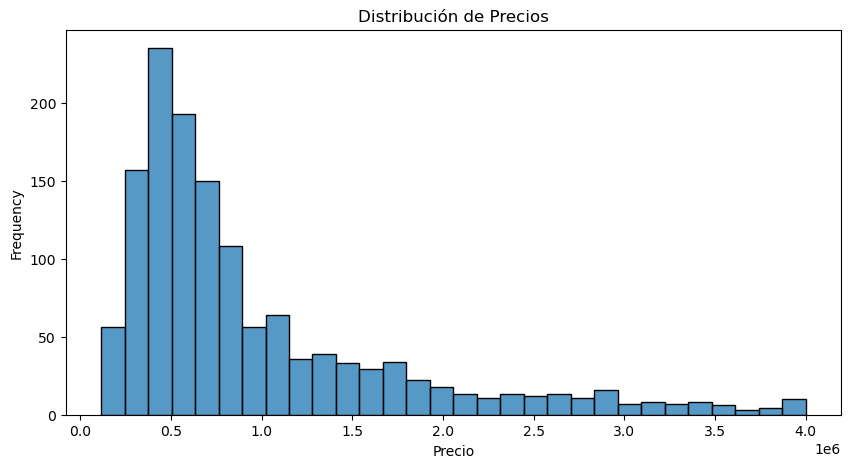

In [17]:
# Análisis de la variable dependiente (Price)
plt.figure(figsize=(10,5))
sns.histplot(df['Price'], bins=30)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frequency')
plt.show()


**Observacion del Precio**: La distribucion de los precios indica que hay muchos mas vehiculos en precios bajos que precios altos, no se debe confundir la escala pues esta en 1e7.

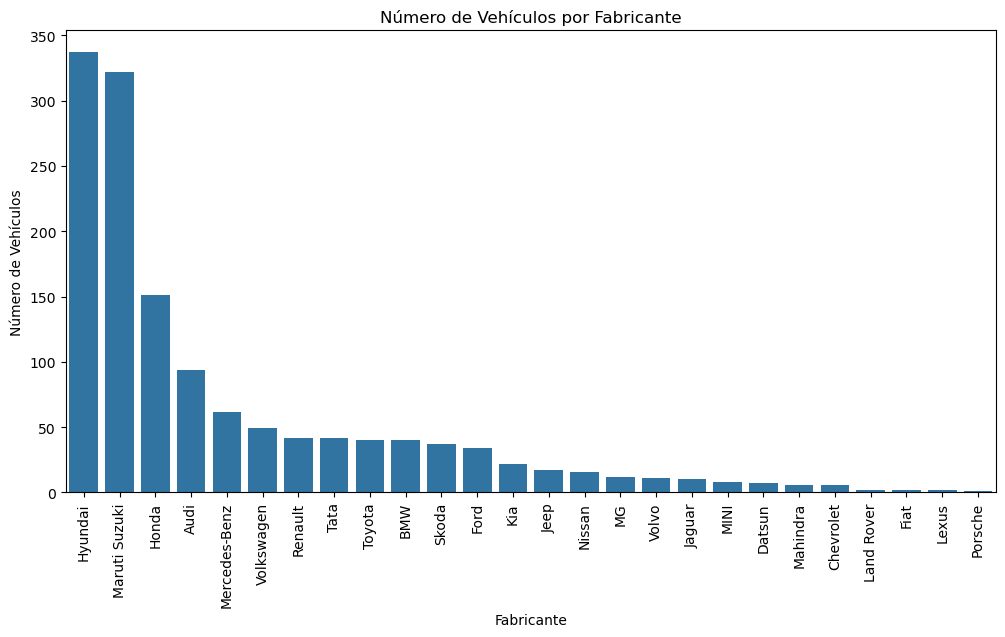

In [18]:
#Analisis de Cantidad de Vehiculos Por Fabricante
conteo_modelos = df['Make'].value_counts()

plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=conteo_modelos.index, y=conteo_modelos.values)
plt.title('Número de Vehículos por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Número de Vehículos')
plt.xticks(rotation=90)  
plt.show()

<h2>Analisis Multivariado<h2>

<h3>Analisis Fabricante y Precio<h3>

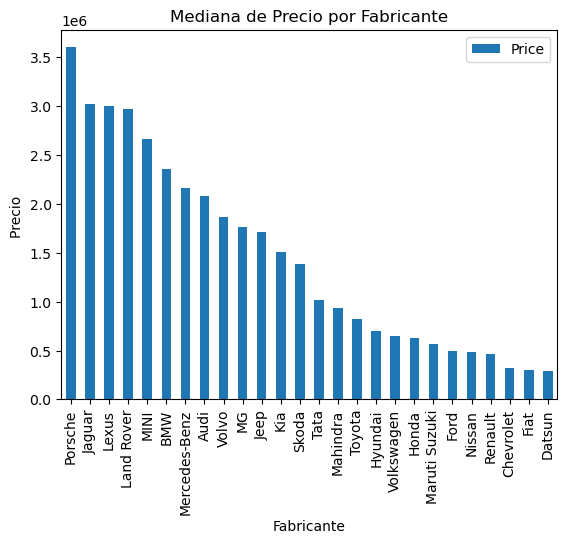

In [19]:
precios_maximos = df.groupby("Make")["Price"].mean().sort_values(ascending=False)

# Crear el gráfico de barras
precios_maximos.plot(kind="bar", legend=True)
plt.title('Mediana de Precio por Fabricante')
plt.xlabel('Fabricante')
plt.ylabel('Precio ')
plt.show()

**El fabricante Ejerce influencia en el precio del vehiculo**

<h3>Analisis Modelo y Precio<h3>

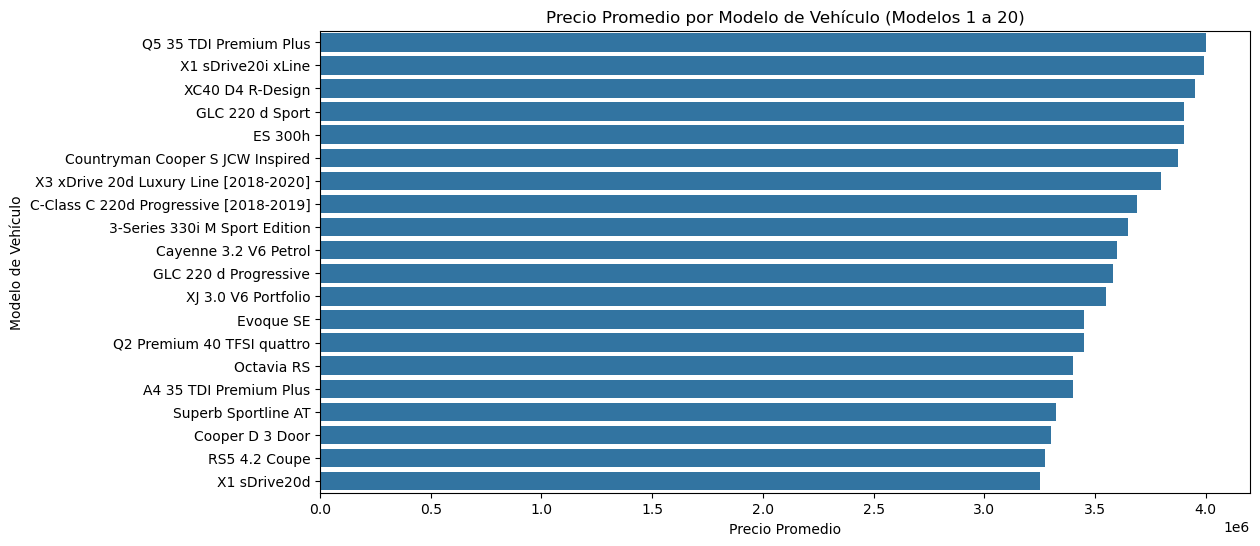

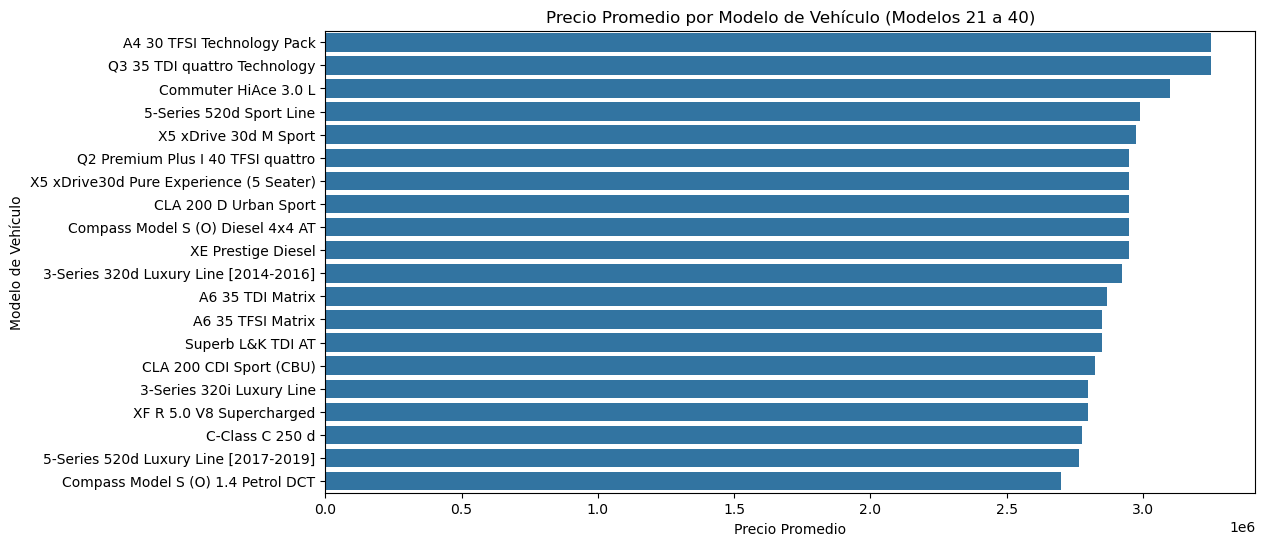

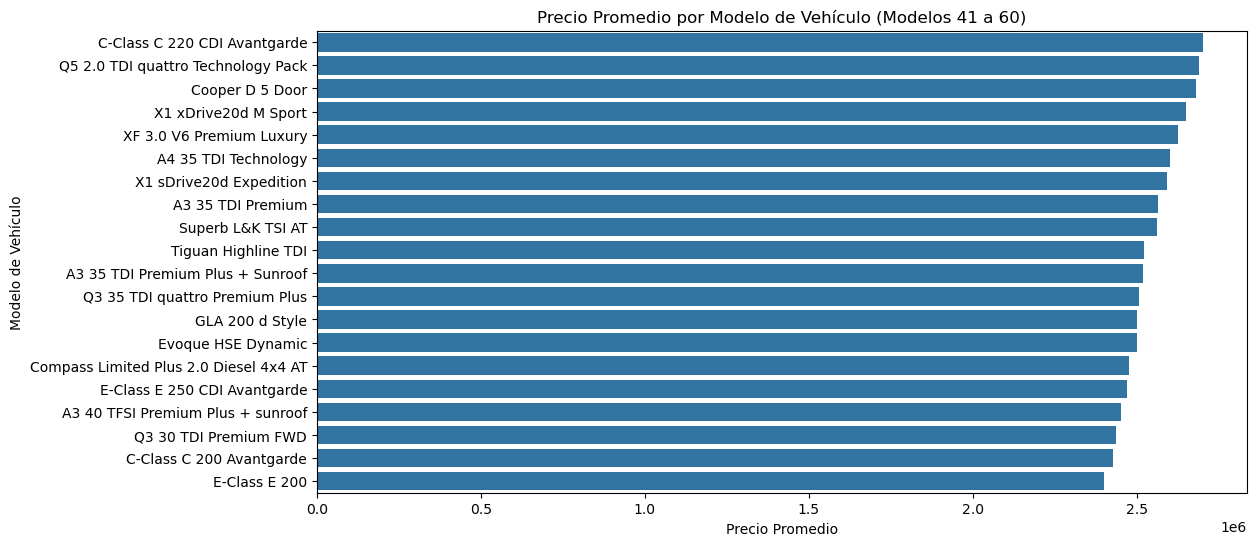

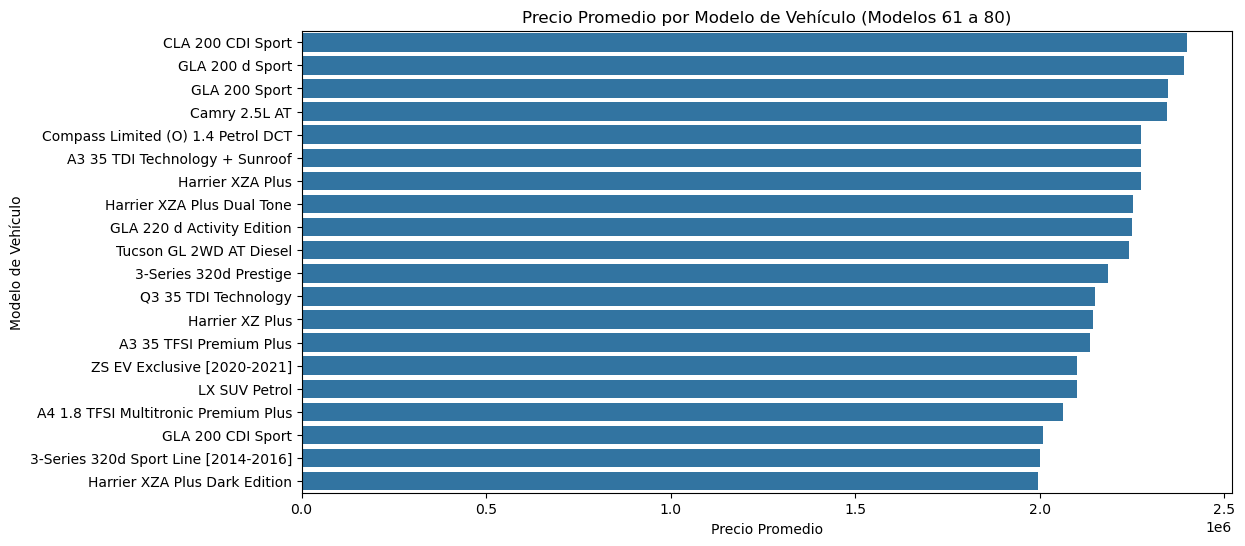

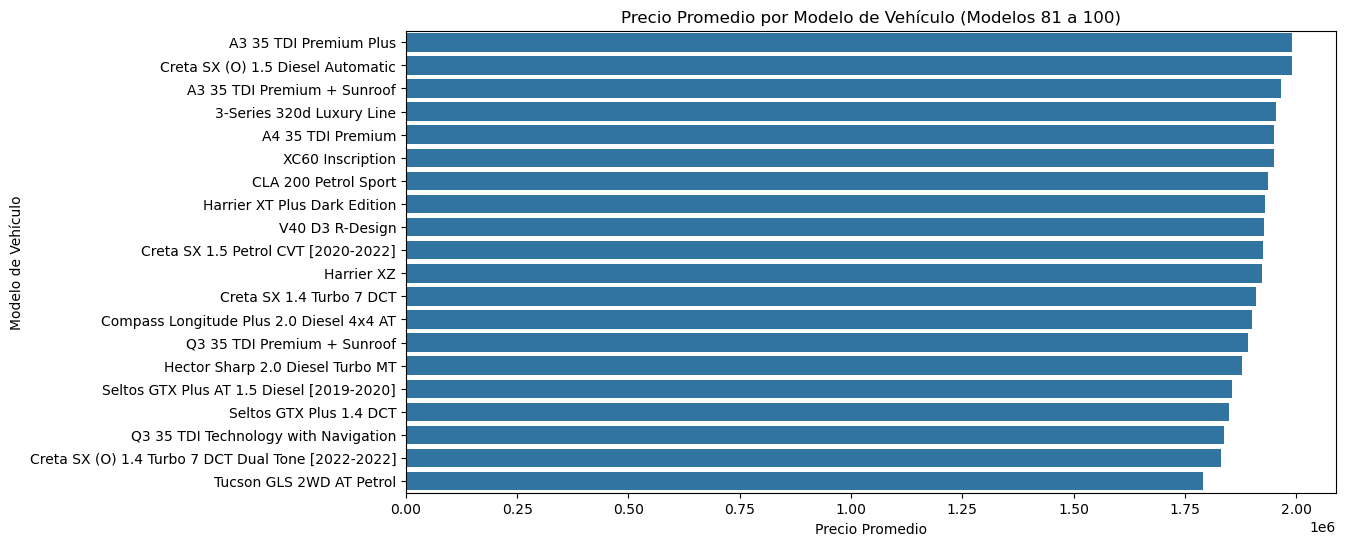

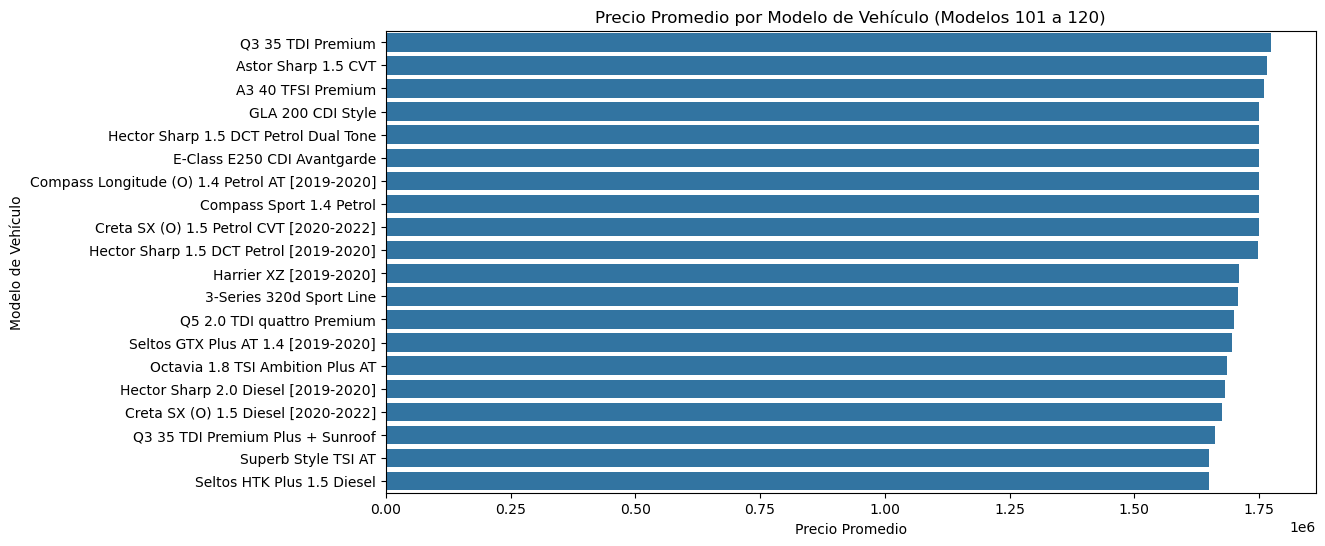

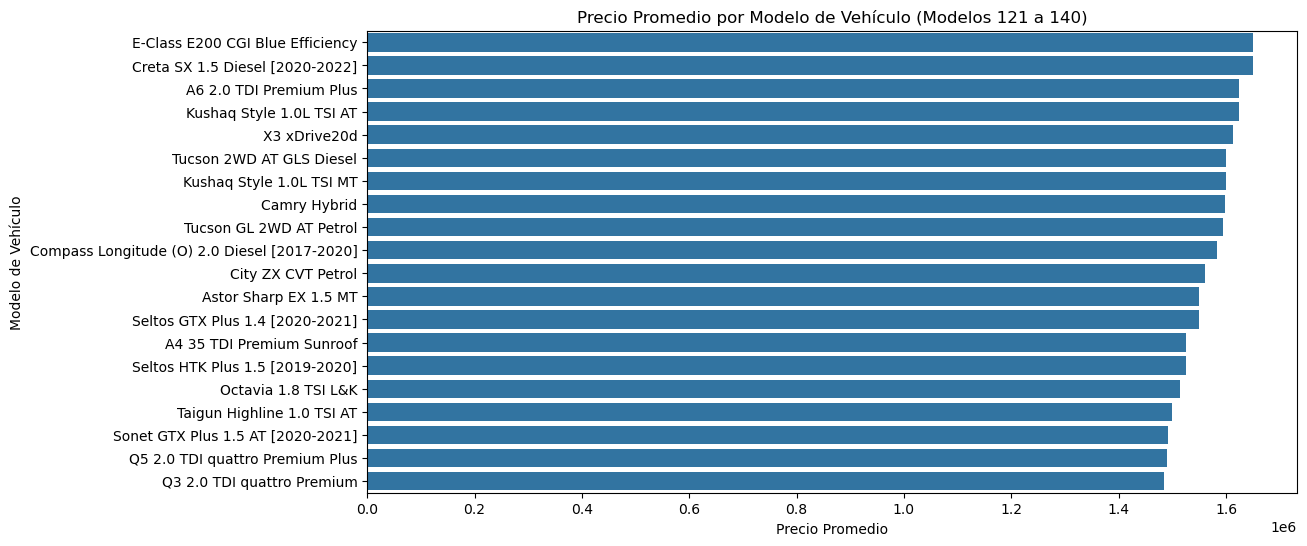

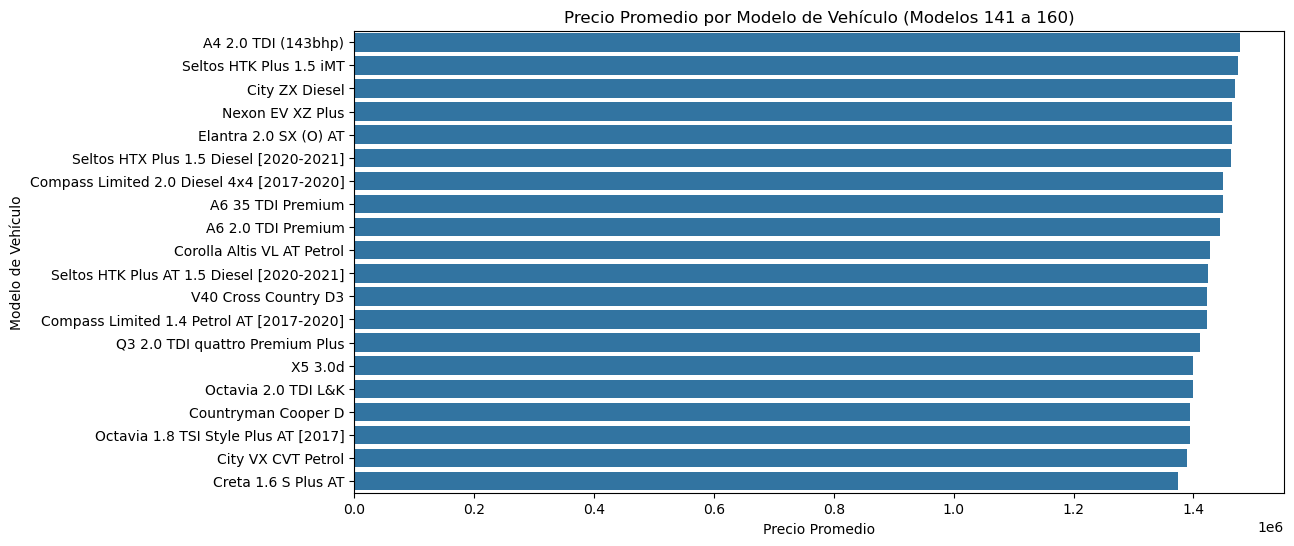

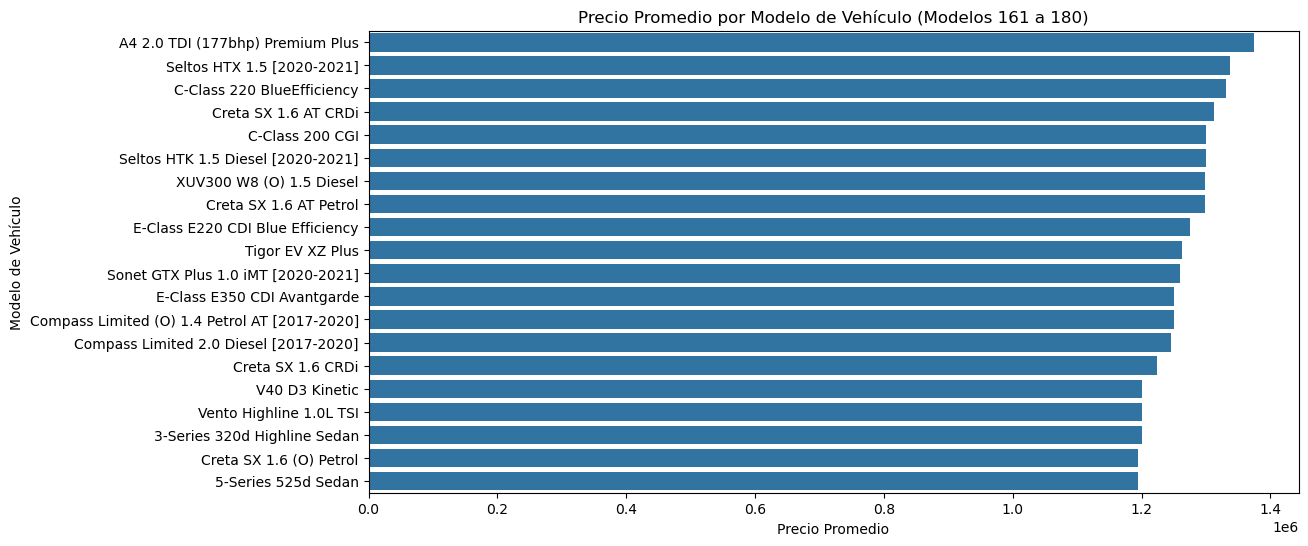

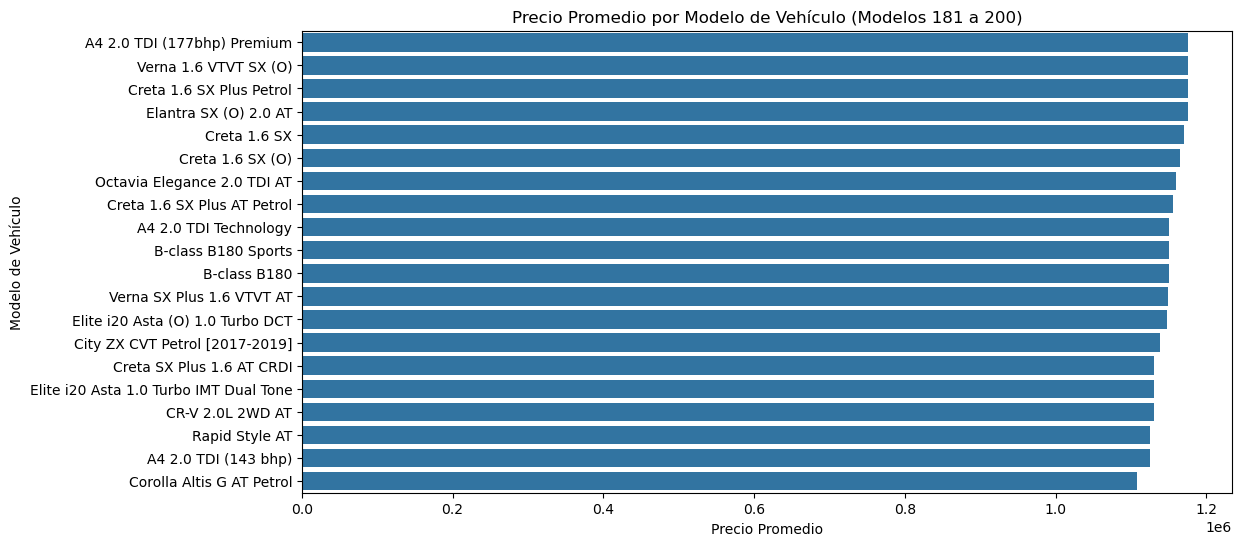

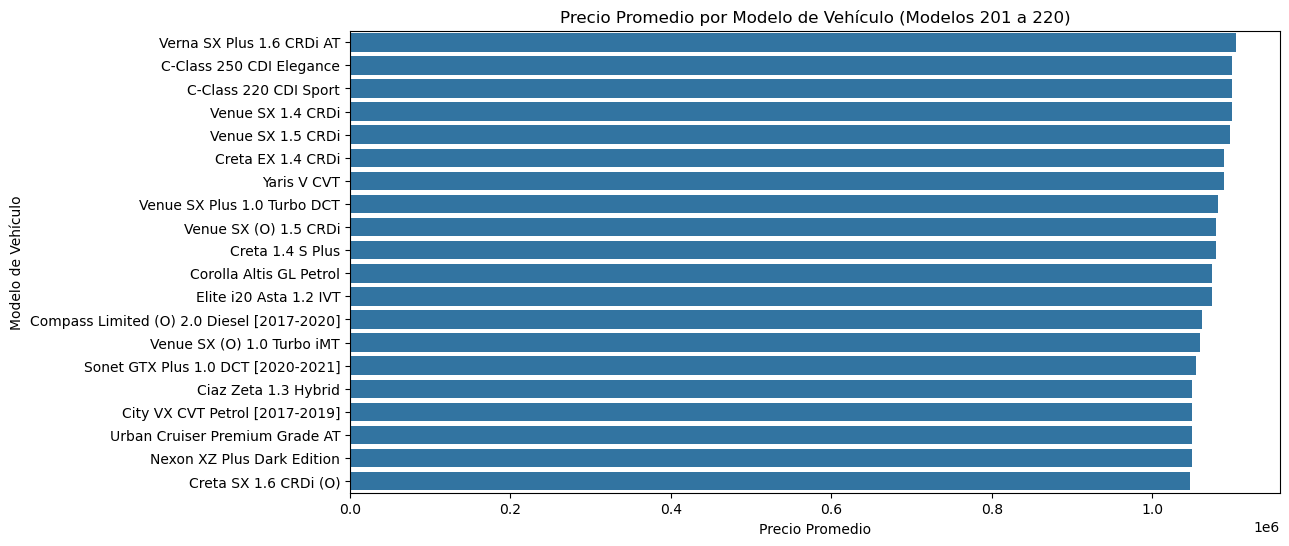

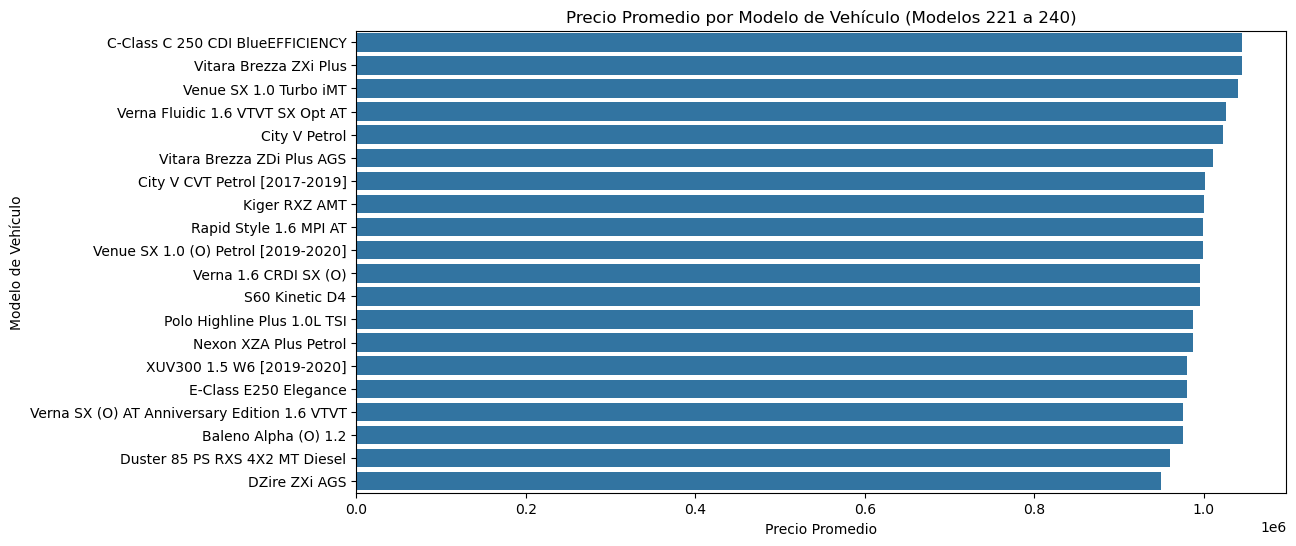

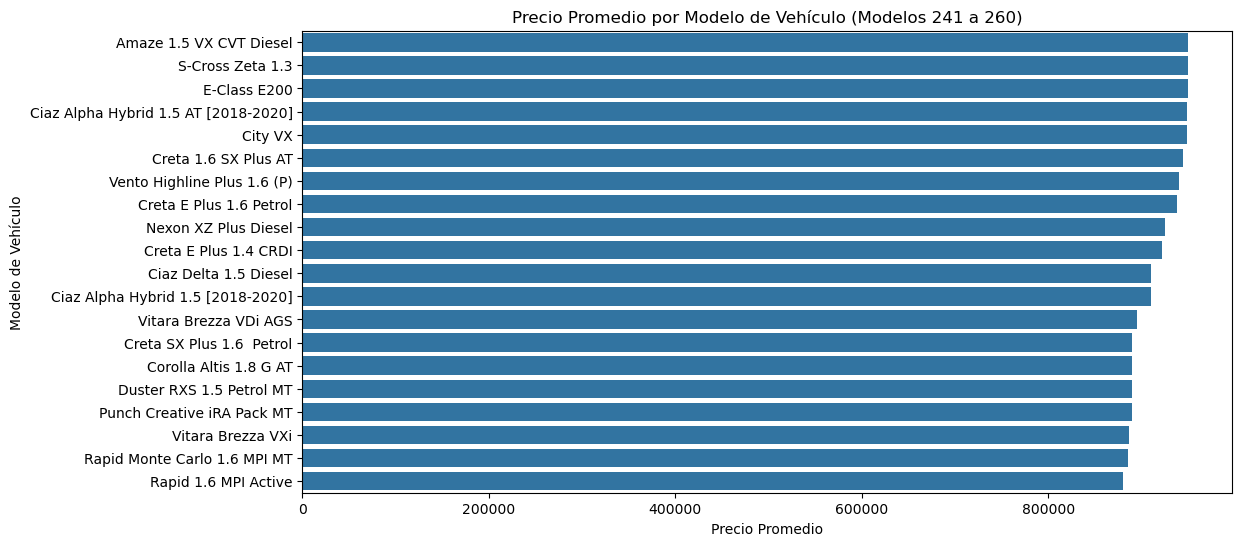

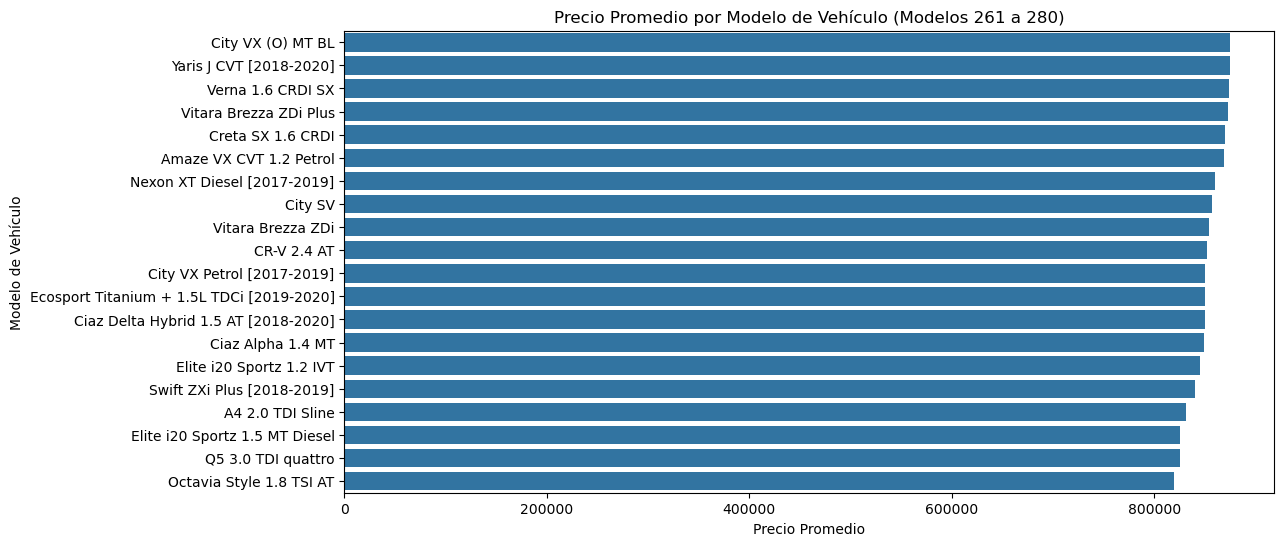

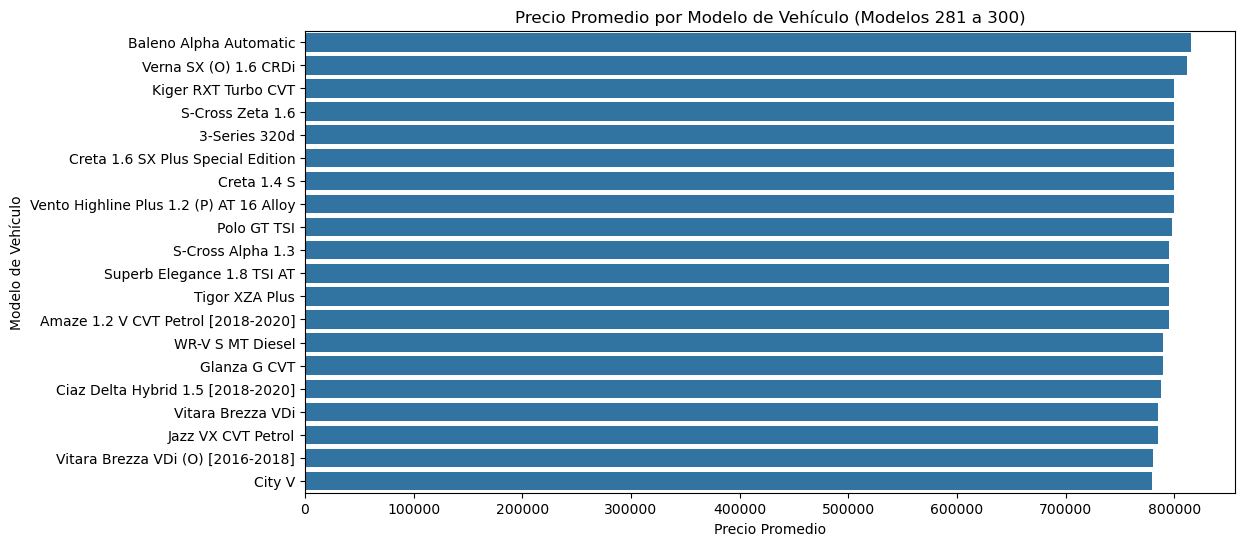

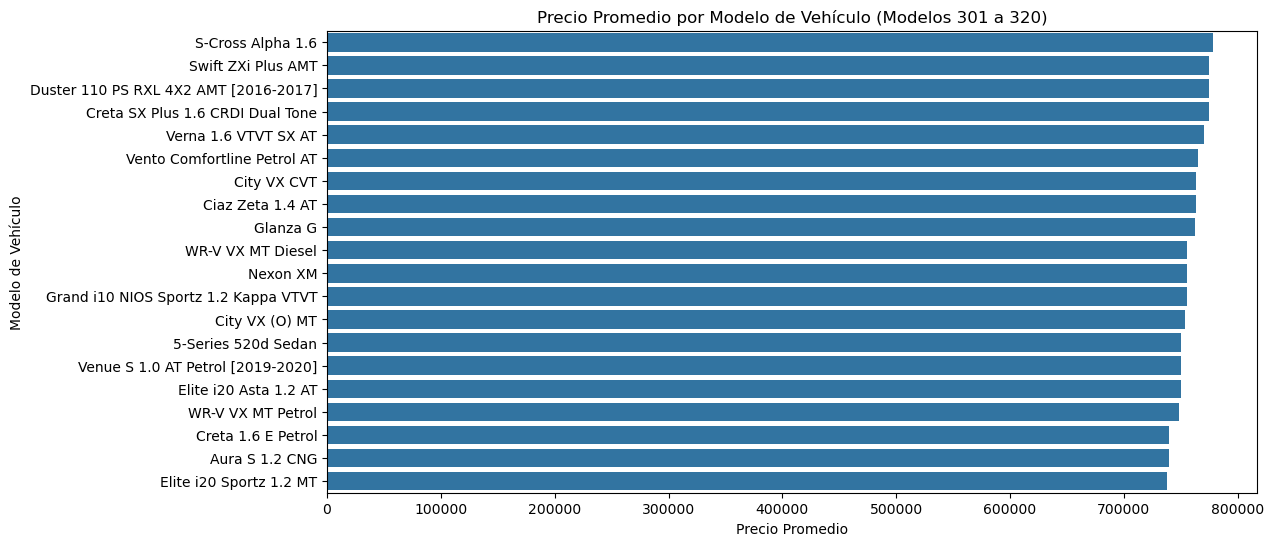

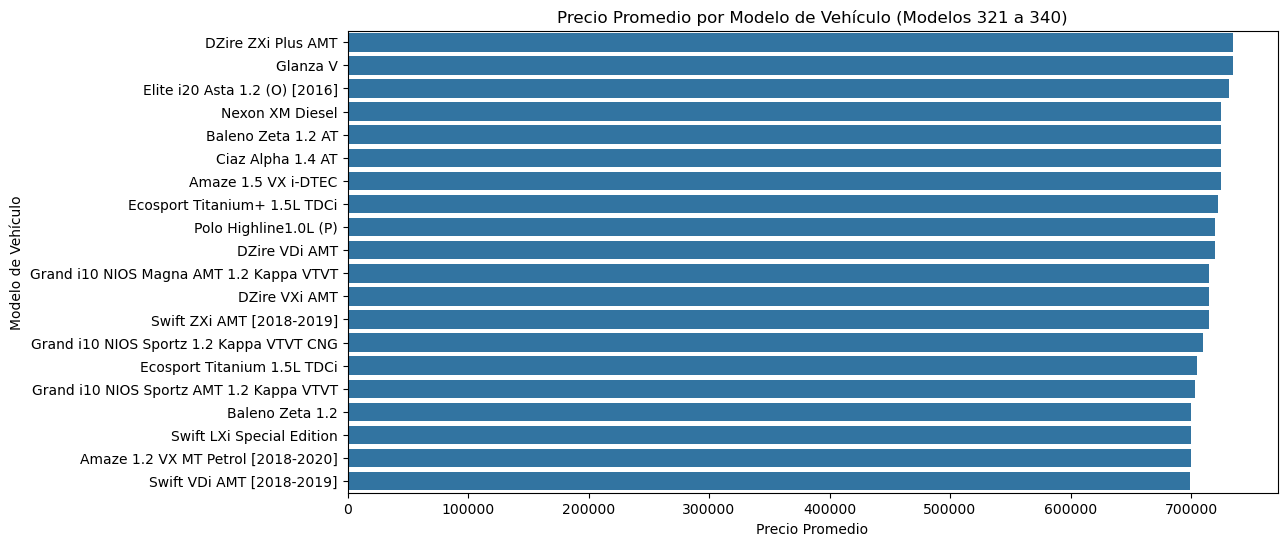

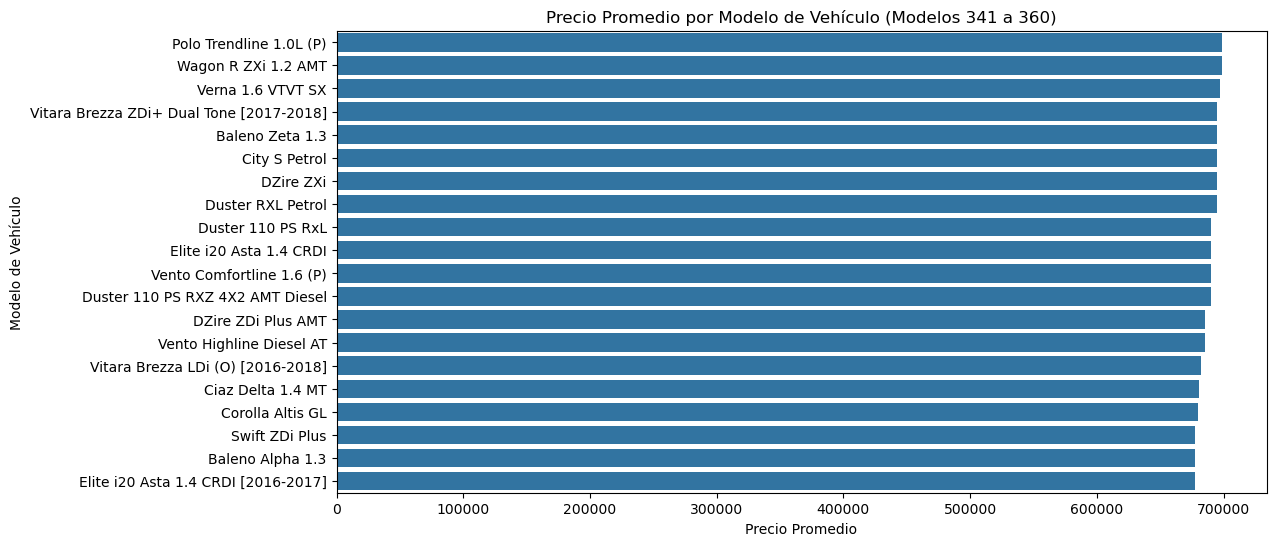

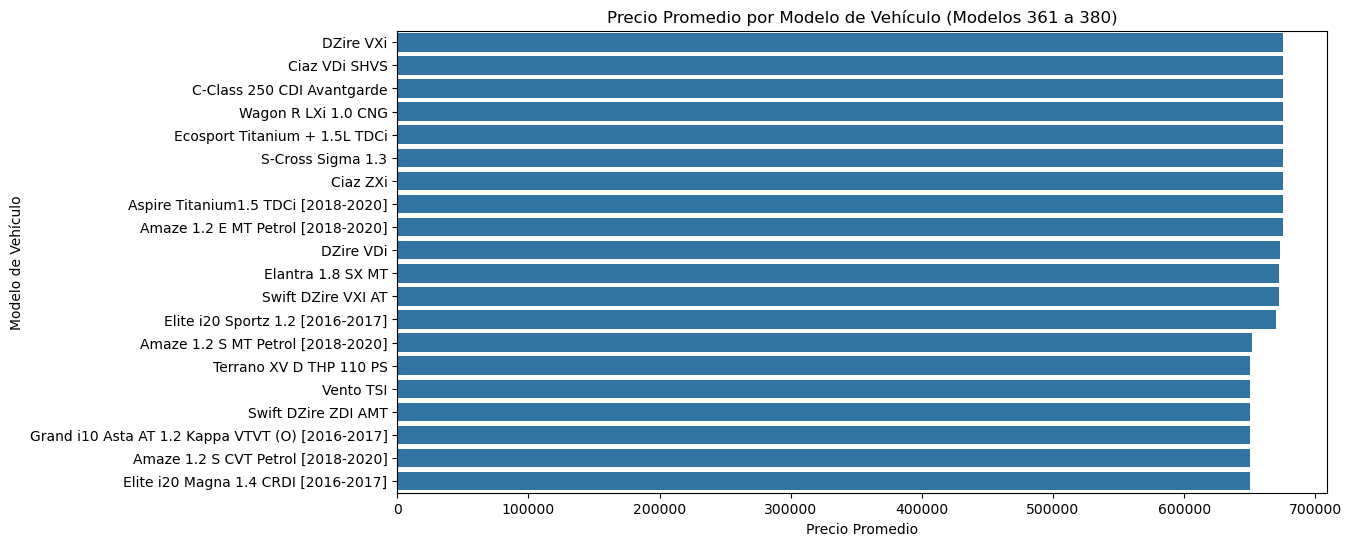

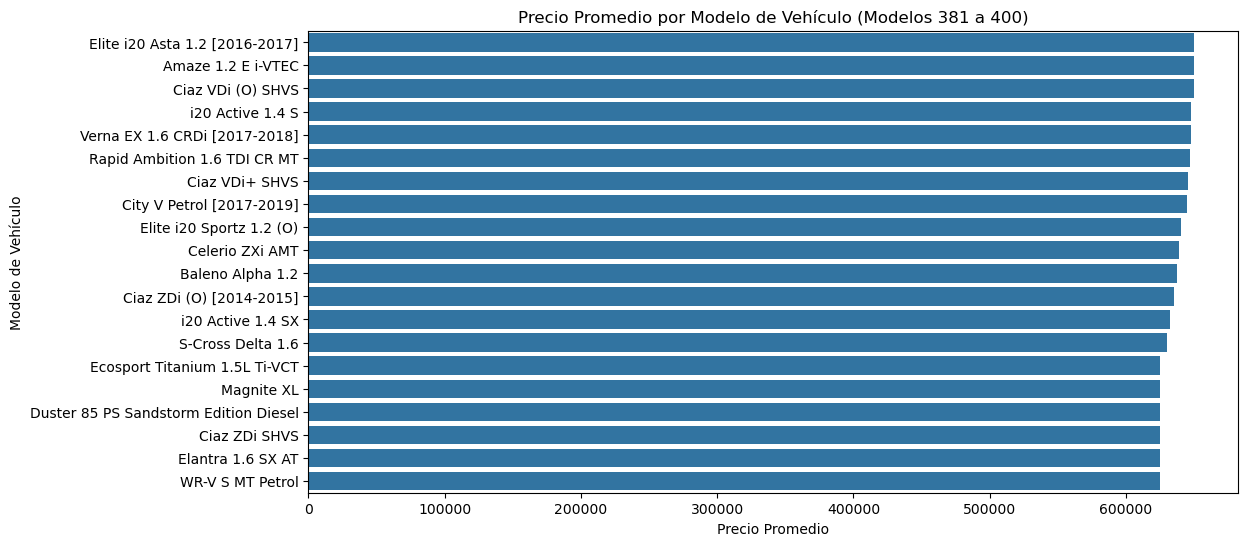

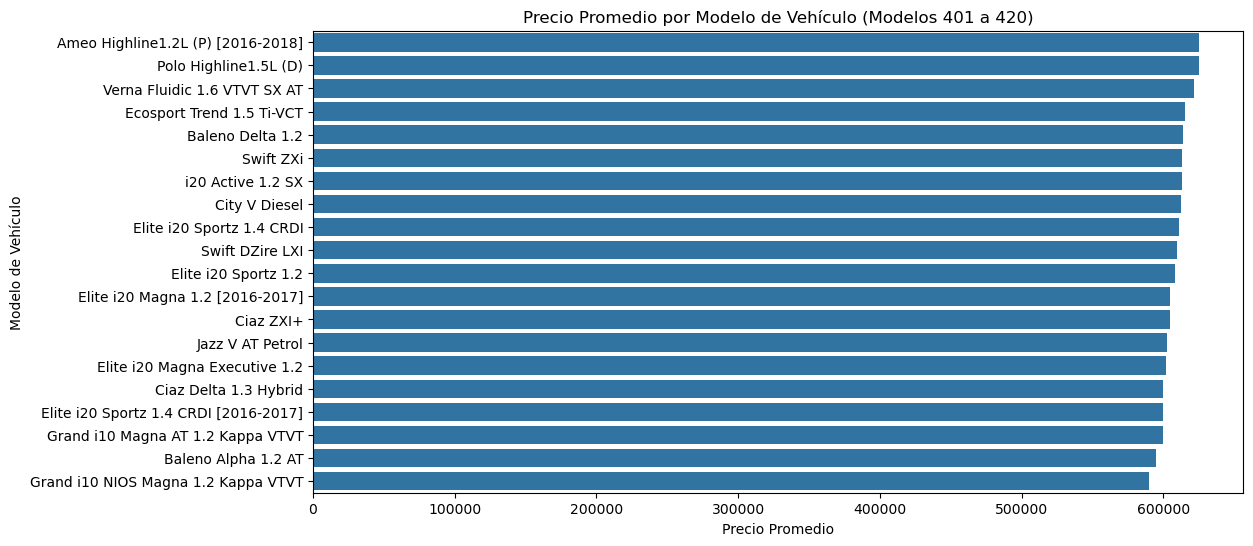

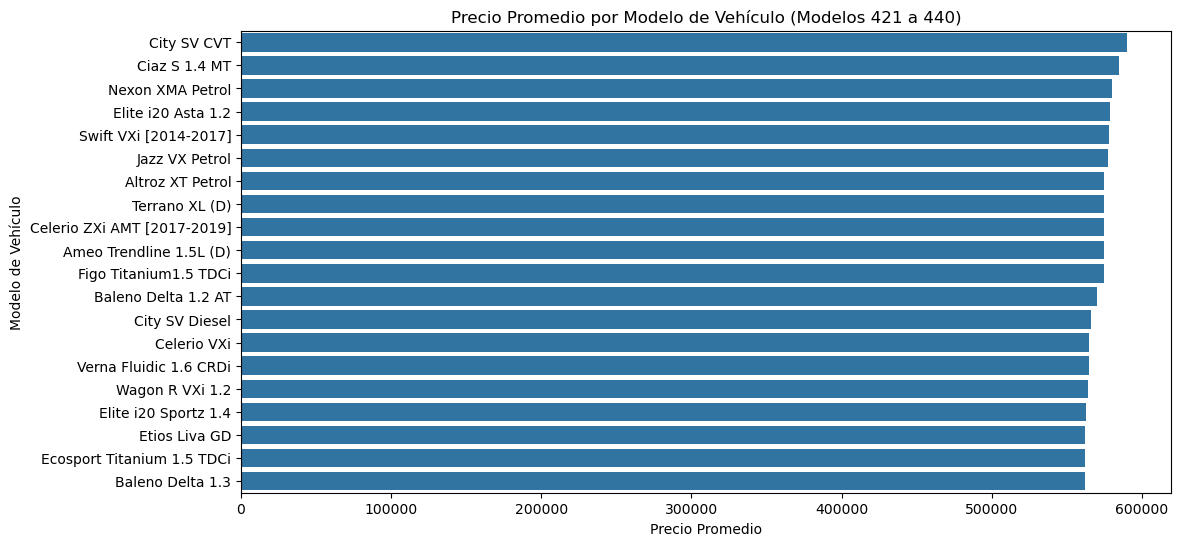

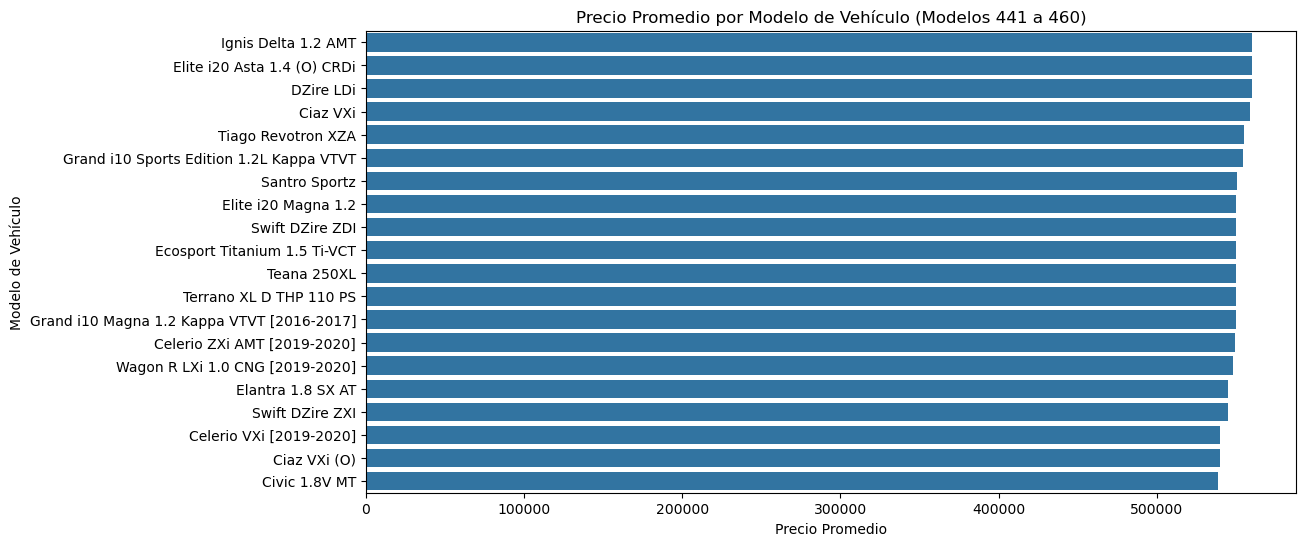

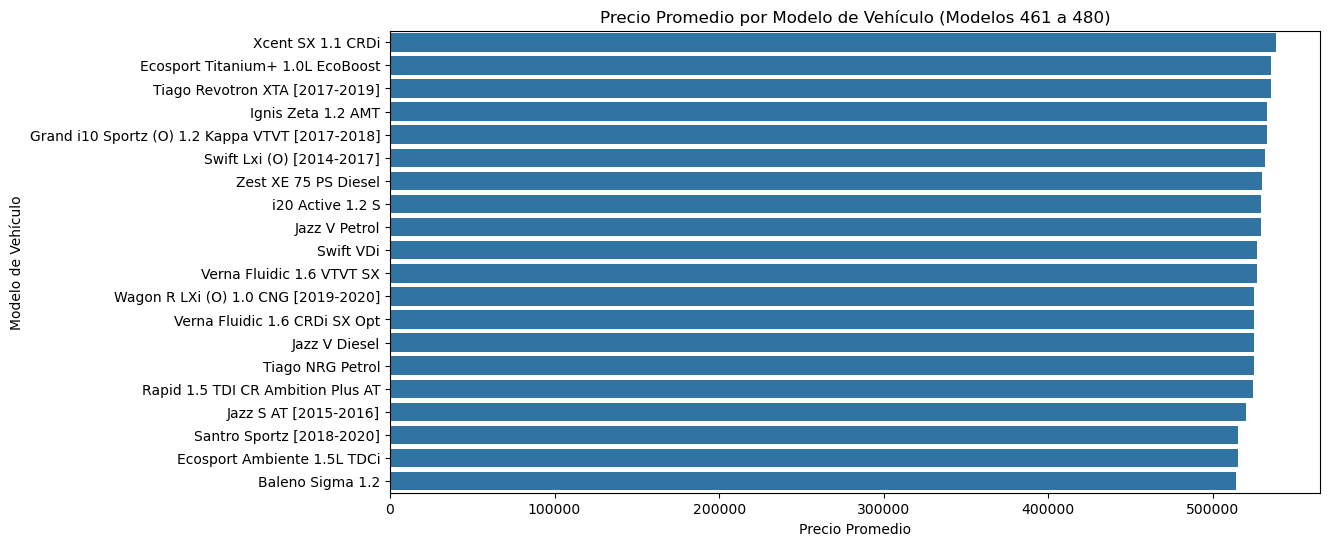

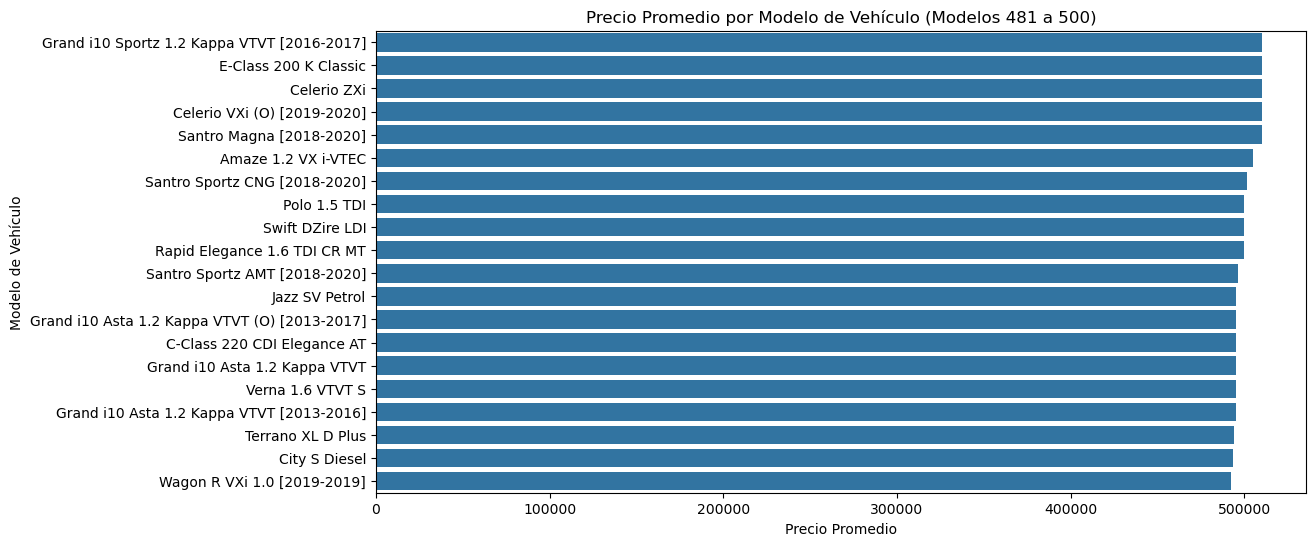

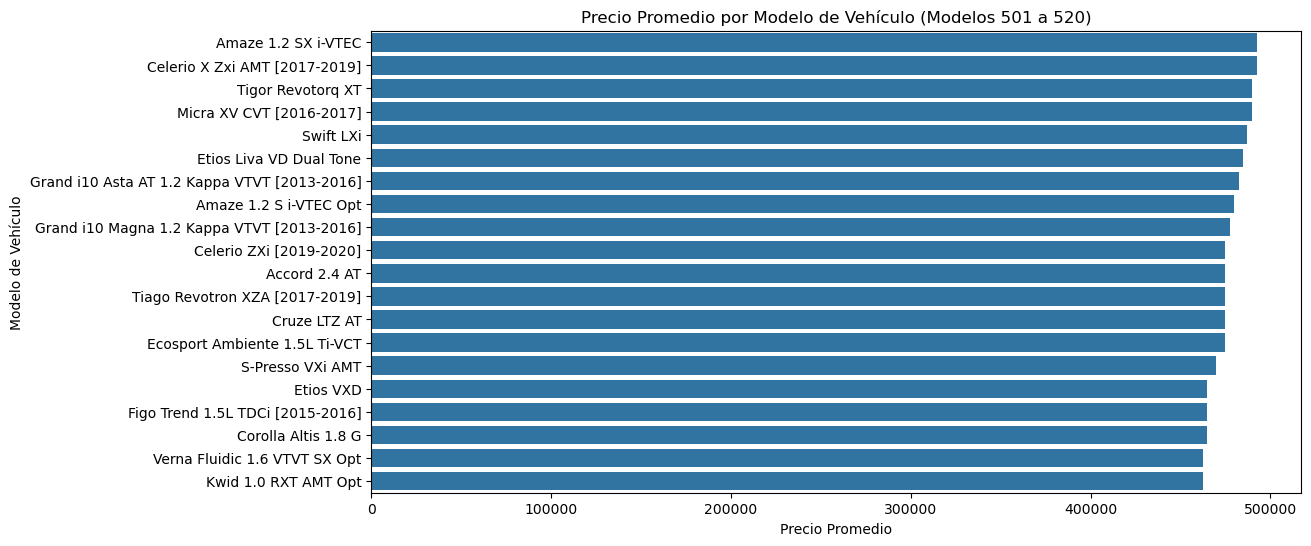

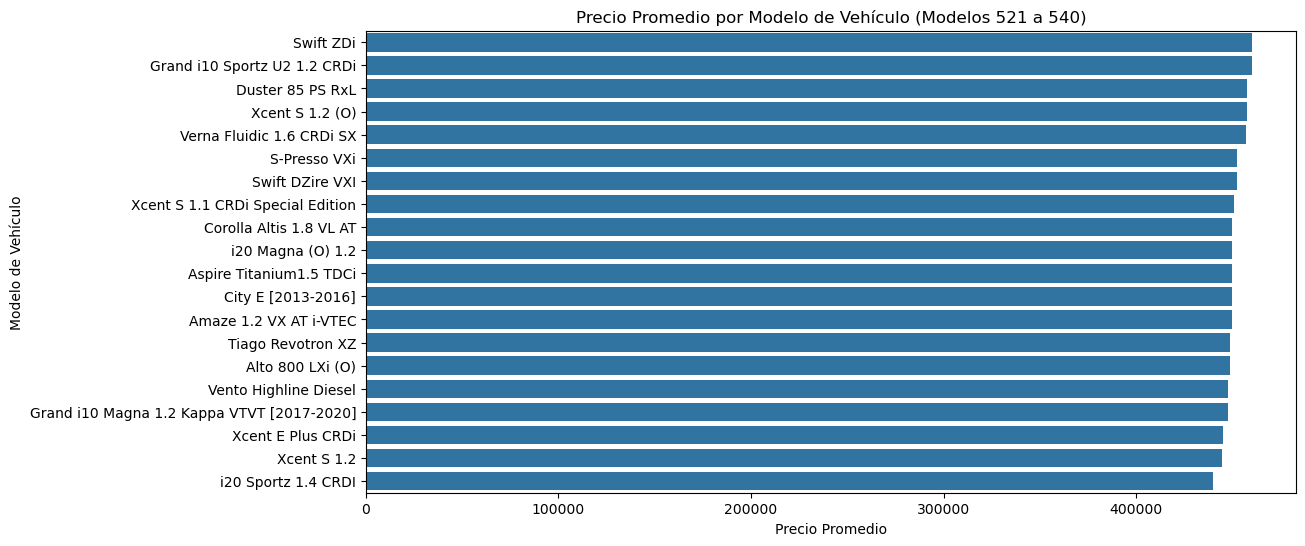

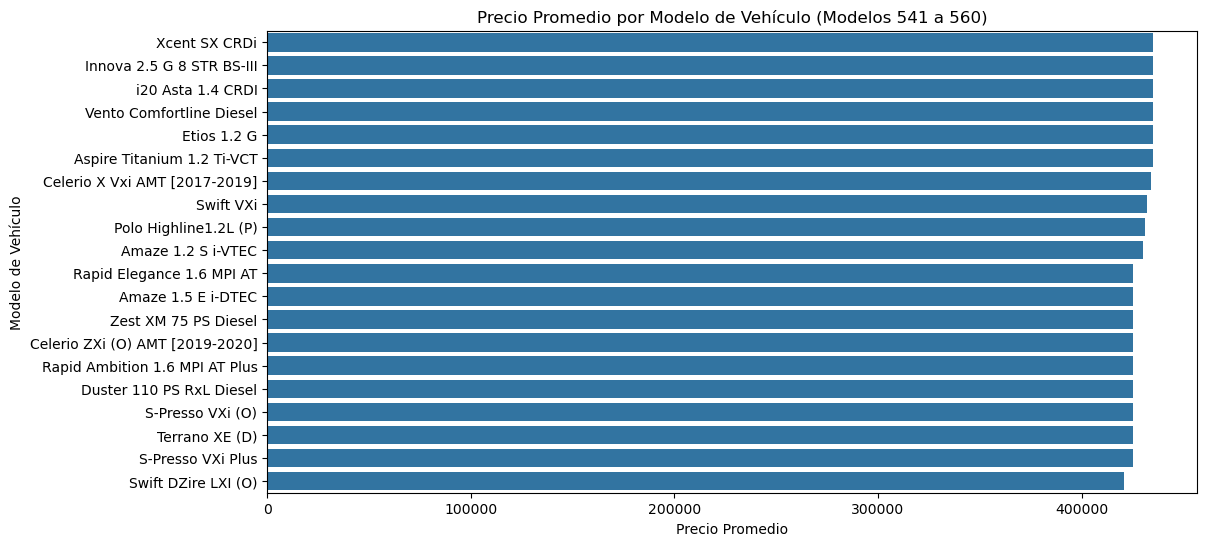

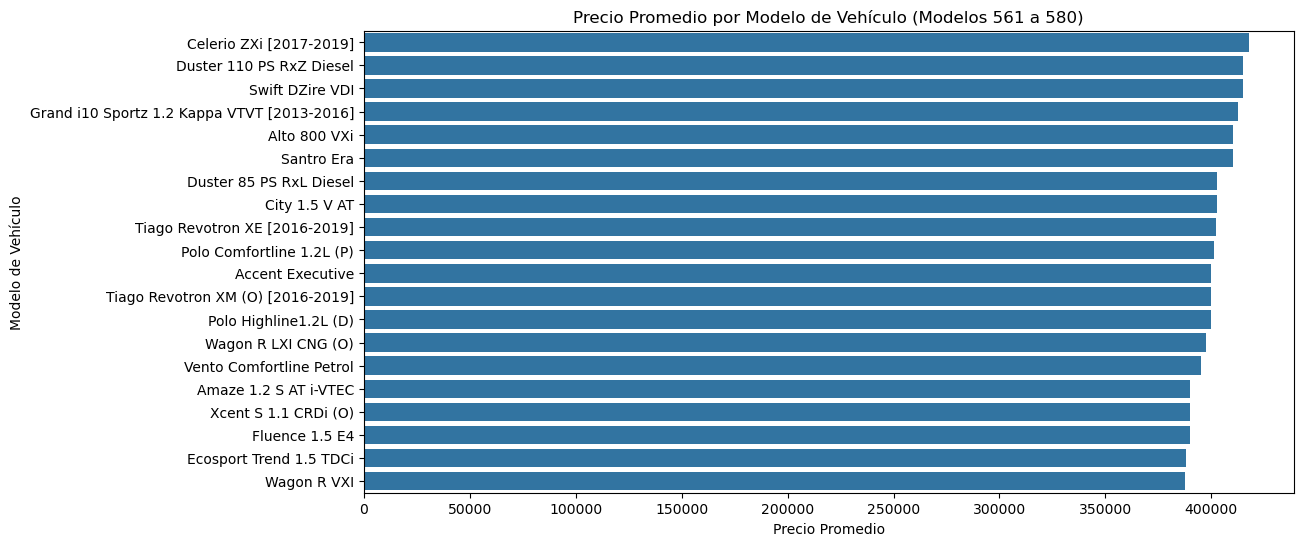

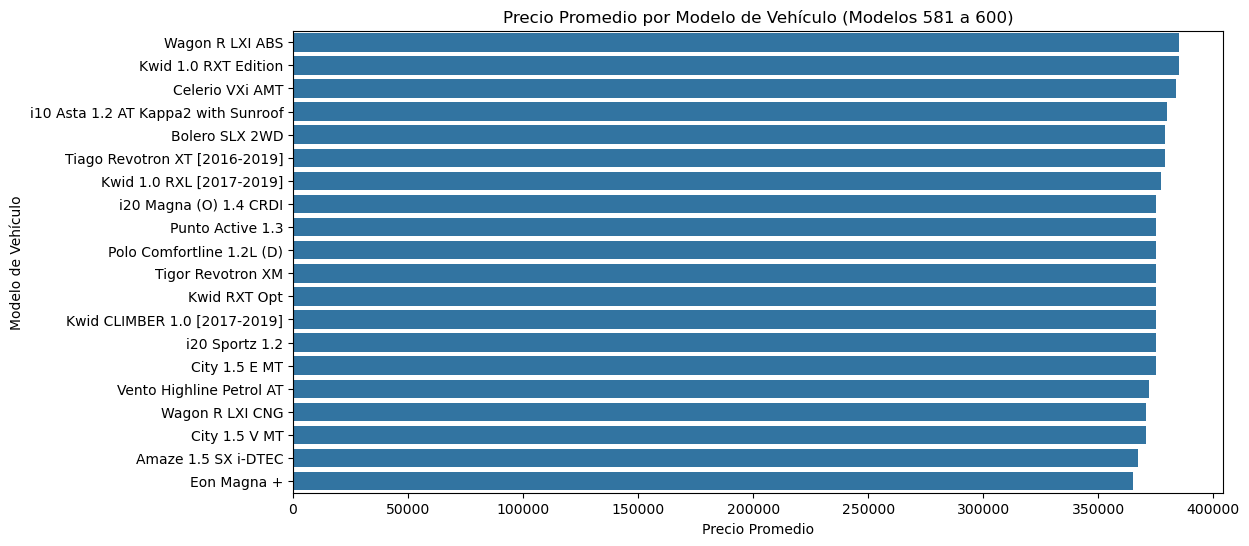

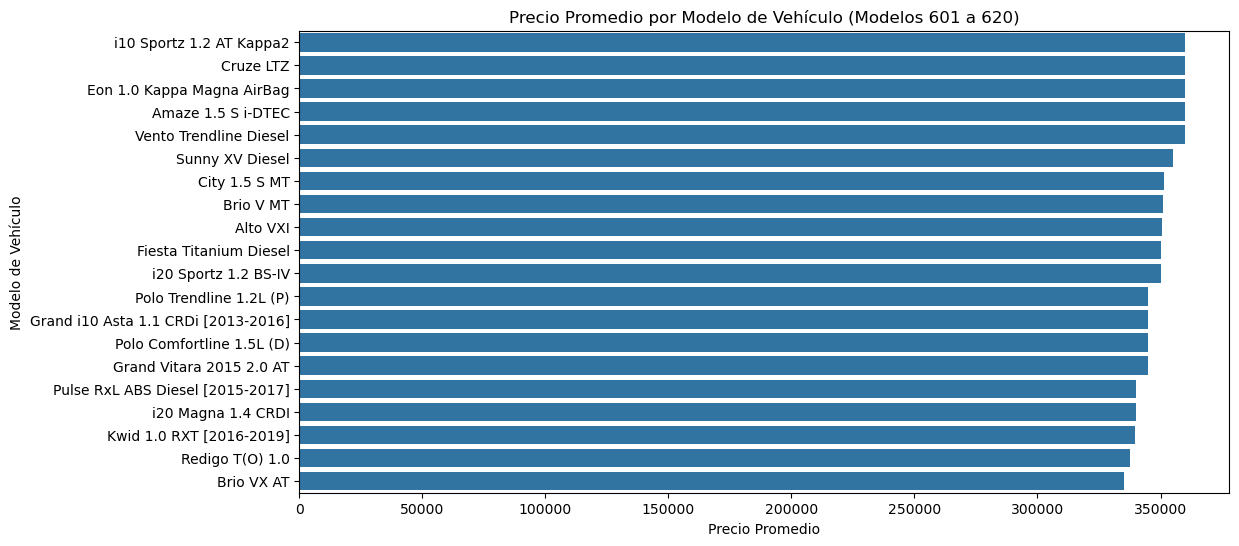

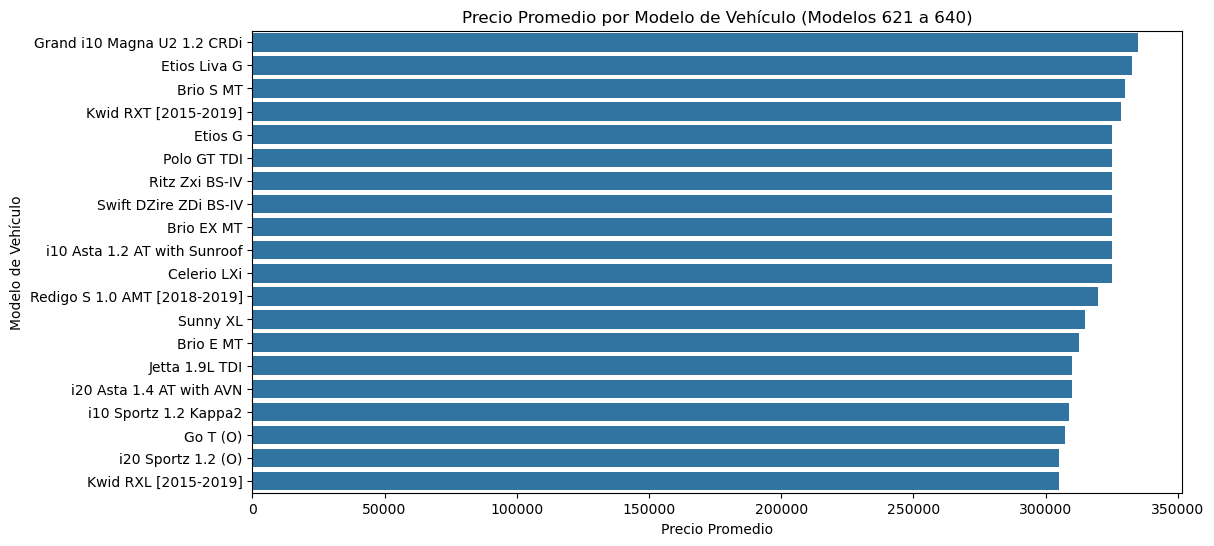

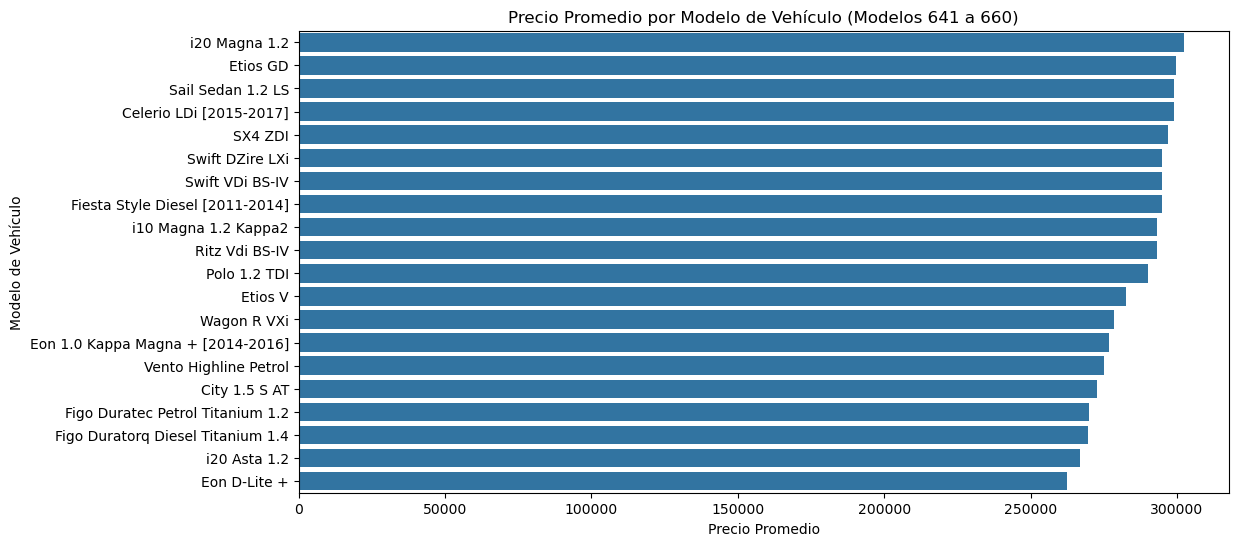

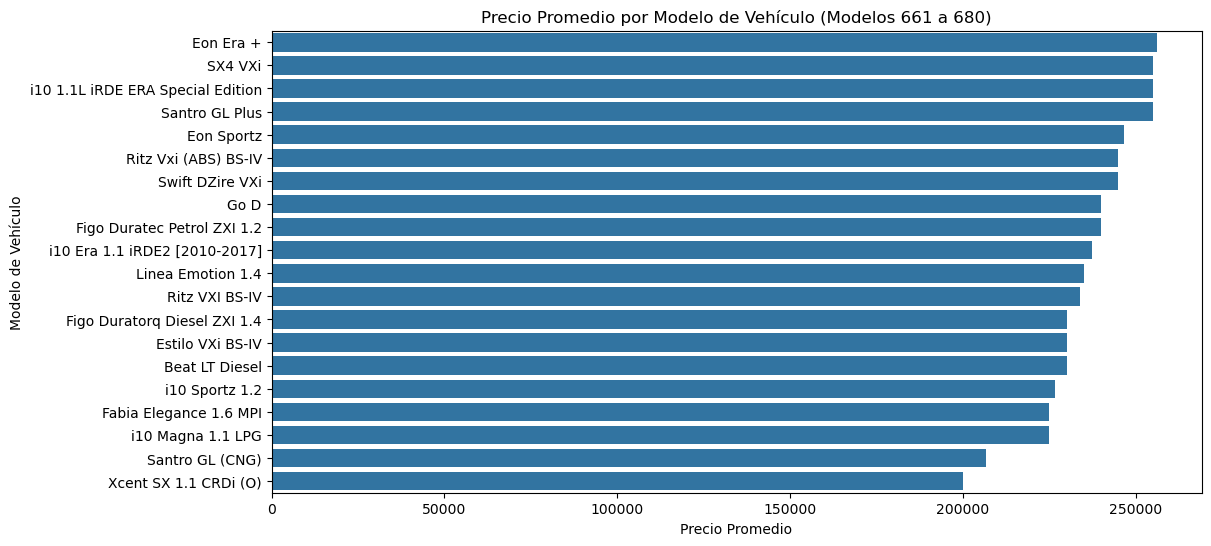

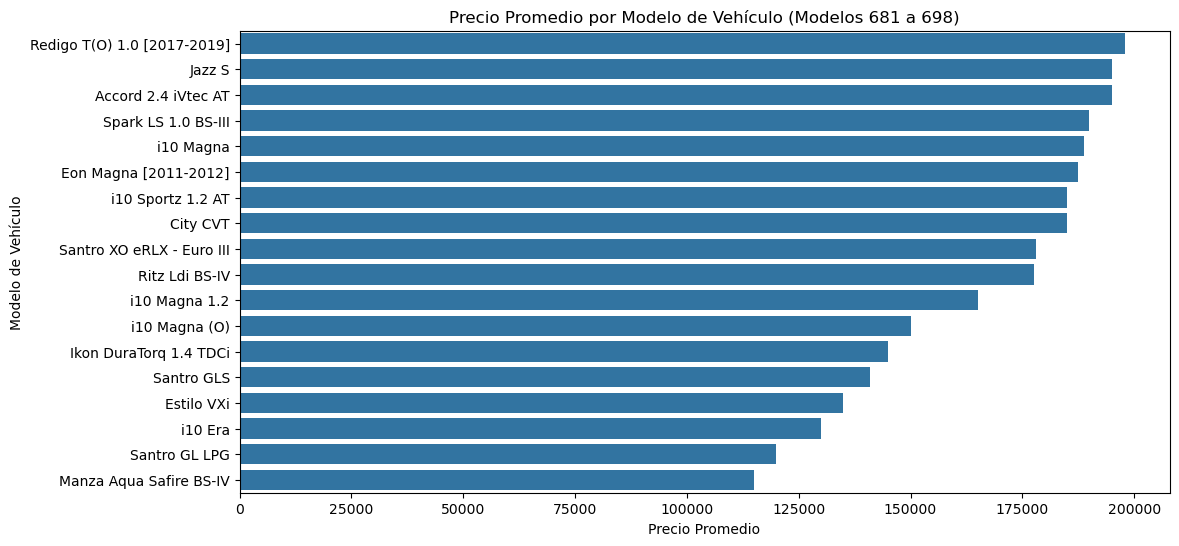

In [20]:

#  Agrupar por modelo y calcular la media del precio
precio_por_modelo = df.groupby('Model')['Price'].mean().reset_index()

#  Ordenar los modelos por precio
precio_por_modelo = precio_por_modelo.sort_values(by='Price', ascending=False)

n = 20  # Paginar
for i in range(0, len(precio_por_modelo), n):
    subset = precio_por_modelo.iloc[i:i+n]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Price', y='Model', data=subset)
    plt.title(f'Precio Promedio por Modelo de Vehículo (Modelos {i+1} a {min(i+n, len(precio_por_modelo))})')
    plt.xlabel('Precio Promedio')
    plt.ylabel('Modelo de Vehículo')
    plt.show()



**En el dataset Se encuentran con alrededor de 1050 modelos de vehiculos , al graficar los precios en relacion a los modelos , se refleja la tendencia donde el modelo tiene influencia en el precio.**

<h3>Relacion Dueño y Precio<h3>

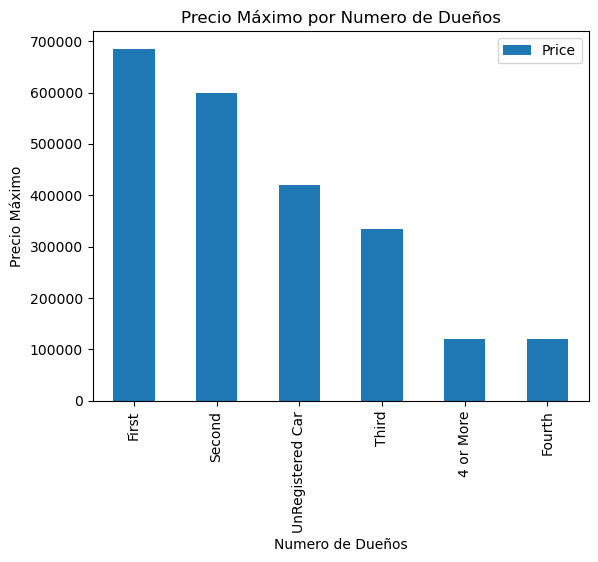

In [21]:
precios_maximos = df.groupby("Owner")["Price"].median().sort_values(ascending=False)

# Crear el gráfico de barras
precios_maximos.plot(kind="bar", legend=True)
plt.title('Precio Máximo por Numero de Dueños')
plt.xlabel('Numero de Dueños')
plt.ylabel('Precio Máximo')
plt.show()

**Se nota un aumento de precios en la categoria de First Car, lo puede indicar que son autos que han tenido 2 dueños o menos manejan precios mas altos**

<h3>Relacion Años y Precio<h3>

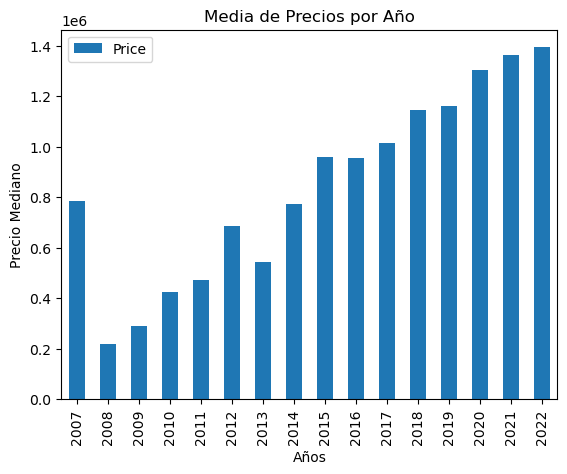

In [22]:
precios_medianos = df.groupby("Year")["Price"].mean().sort_index()

# Crear el gráfico de barras
precios_medianos.plot(kind="bar", legend=True)
plt.title('Media de Precios por Año')
plt.xlabel('Años')
plt.ylabel('Precio Mediano')
plt.show()


**Se sigue cierta tendencia de a la alta de precios de vehiculos con año mas recientes , solo hasta el 2013, de ahi en adelante, varian los precios en relacion a los años.**

<h3>Analisis de la relacion entre kilometraje, precio y fabricante<h3>

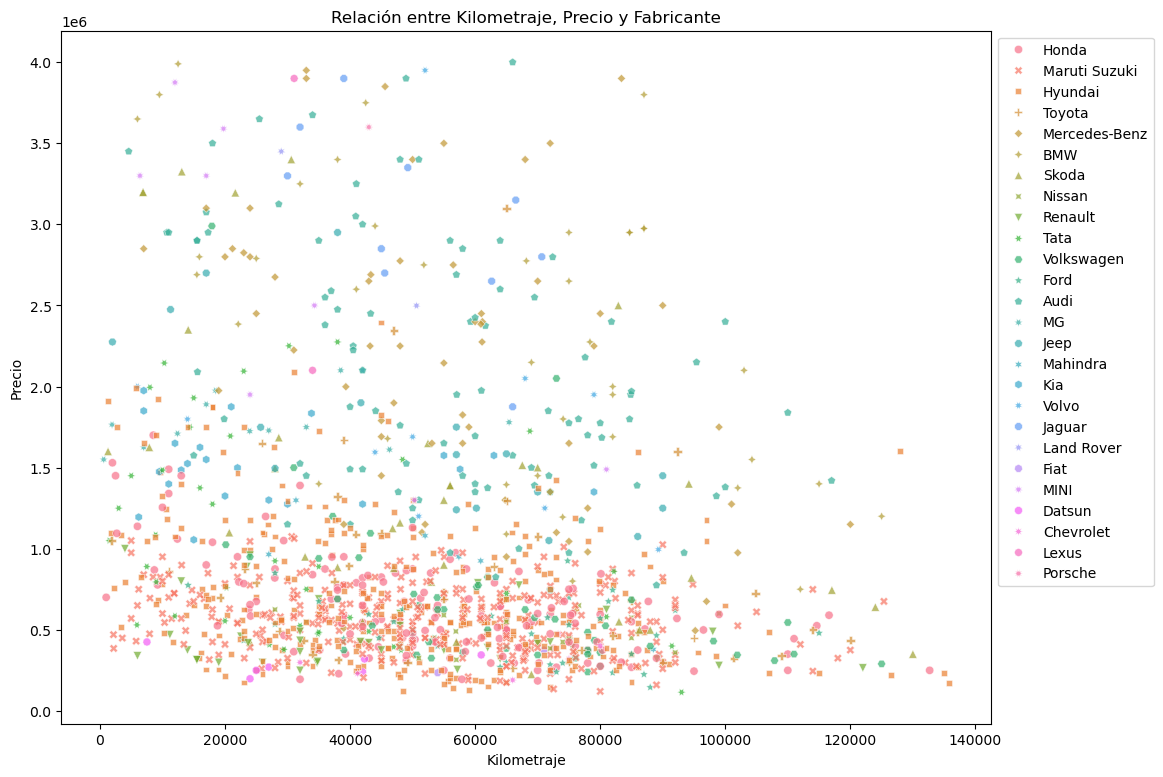

In [23]:

plt.figure(figsize=(12, 9))
sns.scatterplot(data=df, x='Kilometer', y='Price', hue='Make', style='Make', alpha=0.7)
plt.title('Relación entre Kilometraje, Precio y Fabricante')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


**Se determina que entre mas alto el kilometraje del vehiculo mas bajo es el precio.**

<h3>Analisis Entre Transmision y Precio<h3>


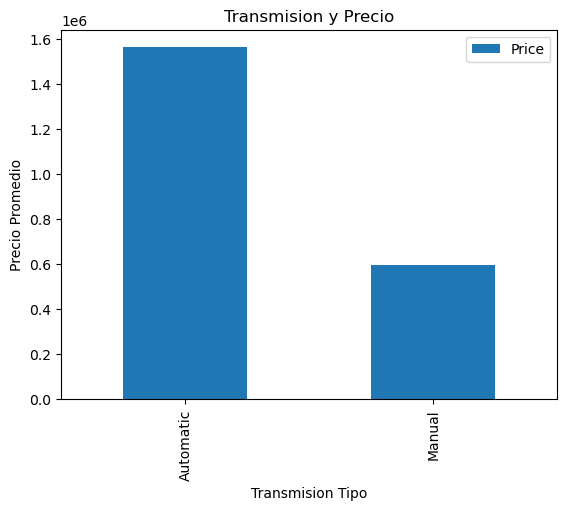

In [24]:

precios_medianos = df.groupby("Transmission")["Price"].mean().sort_index()

# Crear el gráfico de barras
precios_medianos.plot(kind="bar", legend=True)
plt.title('Transmision y Precio')
plt.xlabel('Transmision Tipo')
plt.ylabel('Precio Promedio')
plt.show()

**Se Revela una relacion directa entre el tipo de transmision y el precio, donde el precio del vehiculos con transmision automatica son mas caros que los manuales.**

<h3>Relacion entre Tipo de Combustible y Precio<h3>

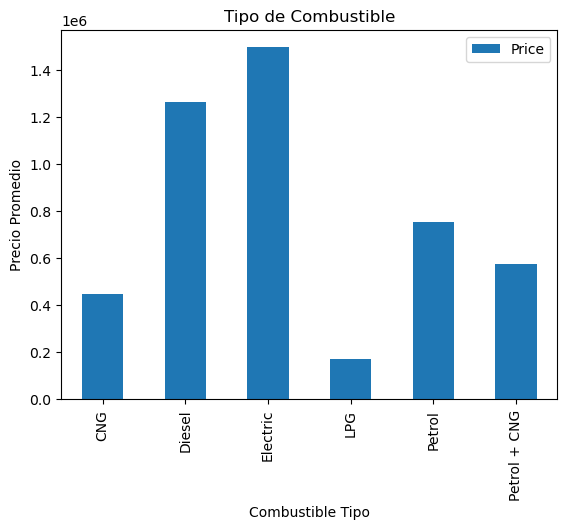

In [25]:

precios_medianos = df.groupby("Fuel Type")["Price"].mean().sort_index()

# Crear el gráfico de barras
precios_medianos.plot(kind="bar", legend=True)
plt.title('Tipo de Combustible')
plt.xlabel('Combustible Tipo')
plt.ylabel('Precio Promedio')
plt.show()

<h3>Relacion Entre Fuel Tank Capacity y Precio<h3>

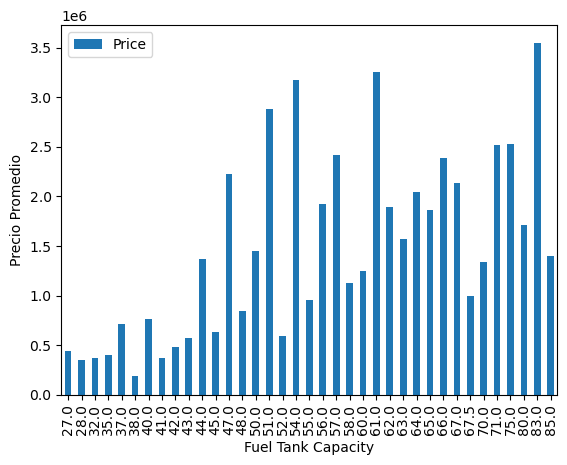

In [26]:
precios_medianos = df.groupby("Fuel Tank Capacity")["Price"].mean().sort_index()

# Crear el gráfico de barras
precios_medianos.plot(kind="bar", legend=True)
plt.title('')
plt.xlabel('Fuel Tank Capacity')
plt.ylabel('Precio Promedio')
plt.show()

**Existe relacion de aumento de precios entre ciertos datos**

<h2>Modelo de Regresion Lineal <h2>

Es importante determinar de antemano los tipos de datos de cada columna puesto que si son datos categoricos deben convertirse en numericos para que el modelo pueda interpretar los datos de la mejor manera.

<h3>Columnas Categoricas<h3>

In [27]:
for col  in columnas_categoricas:
    print(col)

Make
Model
Fuel Type
Transmission
Location
Color
Owner
Seller Type
Engine
Max Power
Max Torque
Drivetrain


Para la construcción del modelo de regresión lineal, seleccionaremos las variables categóricas que han mostrado correlación con el precio, asegurando que nuestro análisis se enfoque en los factores más influyentes, estas Variables son:  
**Make**  
**Model**  
**Transmission**  
**Fuel Type**  
**Transmission**  
**Owner**  


<h3>Columnas Numericas<h3>

In [28]:
for col  in columnas_numericas:
    print(col)

Price
Year
Kilometer
Length
Width
Height
Seating Capacity
Fuel Tank Capacity


Además, para el desarrollo del modelo de regresión lineal, se elegirán las variables numéricas que han mostrado correlación con el precio. Las variables seleccionadas son:  
**Price**  
**Year**  
**Kilometer**  
**Fuel Tank Capacity**

<h3>Convertir Datos Categoricos a Numericos<h3>

Para **Make**  vamos a crear una columna  donde por cada Fabricante se asignara un unico id. Asimismo se hara con **Owner** y **Fuel Type**.

In [29]:
df['id_Make'] = pd.factorize(df['Make'])[0] + 1  
df['id_Owner'] = pd.factorize(df['Owner'])[0] + 1  
df['id_Fuel_Type'] = pd.factorize(df['Fuel Type'])[0] + 1  


# Guardar el DataFrame modificado
df.to_csv('archivo_modificado.csv', index=False)


#Verificamos la creacion de ambas Columnas
df[['id_Make','id_Owner','id_Fuel_Type']]



id_Make  id_Owner  id_Fuel_Type
0           1         1             1
1           2         2             2
2           3         1             1
3           4         1             1
5           2         1             1
...       ...       ...           ...
2051        2         1             1
2052        3         1             2
2053        2         2             1
2055        3         2             1
2056       12         1             1

[1372 rows x 3 columns]

Para **Transmission** se usara **One-hot-Encoding** para convertir la transmision,la cual puede ser manual o automatica

In [46]:
#Creacion de un nuevo dataframe donde se agregan las columnas de transmission_manual a partir de one-hot-encoding
df_encoded = pd.get_dummies(df, columns=['Transmission'], drop_first=False)

#Convertir  a entero(1 o 0)
df_encoded['Transmission_Manual'] = df_encoded['Transmission_Manual'].astype(int)

#Target Encoding para la creacion de una nueva columna llamada Model_enconding
target_mean = df.groupby('Model')['Price'].mean().to_dict()
df_encoded['Model_enconding'] = df['Model'].map(target_mean)
df_encoded

Make                        Model   Price  Year  Kilometer  \
0             Honda          Amaze 1.2 VX i-VTEC  505000  2017      87150   
1     Maruti Suzuki              Swift DZire VDI  450000  2014      75000   
2           Hyundai         i10 Magna 1.2 Kappa2  220000  2011      67000   
3            Toyota                     Glanza G  799000  2019      37500   
5     Maruti Suzuki                     Ciaz ZXi  675000  2017      73315   
...             ...                          ...     ...   ...        ...   
2051  Maruti Suzuki            Vitara Brezza VXi  925000  2021      48000   
2052        Hyundai          i20 Sportz 1.4 CRDI  409999  2014      68000   
2053  Maruti Suzuki         Ritz Vxi (ABS) BS-IV  245000  2014      79000   
2055        Hyundai                 Eon D-Lite +  275000  2014      83000   
2056           Ford  Figo Duratec Petrol ZXI 1.2  240000  2013      73000   

     Fuel Type   Location   Color   Owner Seller Type  ...   Width  Height  \
0       Petrol       Pune    Grey   First   Corporate  ...  1680.0  1505.0   
1       Diesel   Ludhiana   White  Second  Individual  ...  1695.0  1555.0   
2       Petrol    Lucknow  Maroon   First  Individual  ...  1595.0  1550.0   
3       Petrol  Mangalore     Red   First  Individual  ...  1745.0  1510.0   
5       Petrol       Pune    Grey   First  Individual  ...  1730.0  1485.0   
...        ...        ...     ...     ...         ...  ...     ...     ...   
2051    Petrol  Bangalore   White   First  Individual  ...  1790.0  1640.0   
2052    Diesel       Agra  Silver   First  Individual  ...  1710.0  1505.0   
2053    Petrol  Faridabad   White  Second  Individual  ...  1680.0  1620.0   
2055    Petrol  Ahmedabad   White  Second  Individual  ...  1550.0  1500.0   
2056    Petrol      Thane  Silver   First  Individual  ...  1680.0  1427.0   

     Seating Capacity Fuel Tank Capacity  id_Make  id_Owner  id_Fuel_Type  \
0                 5.0               35.0        1         1             1   
1                 5.0               42.0        2         2             2   
2                 5.0               35.0        3         1             1   
3                 5.0               37.0        4         1             1   
5                 5.0               43.0        2         1             1   
...               ...                ...      ...       ...           ...   
2051              5.0               48.0        2         1             1   
2052              5.0               45.0        3         1             2   
2053              5.0               43.0        2         2             1   
2055              5.0               32.0        3         2             1   
2056              5.0               45.0       12         1             1   

      Transmission_Automatic  Transmission_Manual  Model_enconding  
0                      False                    1    505000.000000  
1                      False                    1    414714.214286  
2                      False                    1    293125.000000  
3                      False                    1    762250.000000  
5                      False                    1    675000.000000  
...                      ...                  ...              ...  
2051                   False                    1    887000.000000  
2052                   False                    1    439999.666667  
2053                   False                    1    245000.000000  
2055                   False                    1    262500.000000  
2056                   False                    1    240000.000000  

[1372 rows x 25 columns]

<h3>Caracteristicas a usar en el Modelo<h3>

In [44]:
df_final=df_encoded[['id_Make','Price','Kilometer','Transmission_Manual','Year','Fuel Tank Capacity','id_Owner','id_Fuel_Type']]
df_final

id_Make   Price  Kilometer  Transmission_Manual  Year  \
0           1  505000      87150                    1  2017   
1           2  450000      75000                    1  2014   
2           3  220000      67000                    1  2011   
3           4  799000      37500                    1  2019   
5           2  675000      73315                    1  2017   
...       ...     ...        ...                  ...   ...   
2051        2  925000      48000                    1  2021   
2052        3  409999      68000                    1  2014   
2053        2  245000      79000                    1  2014   
2055        3  275000      83000                    1  2014   
2056       12  240000      73000                    1  2013   

      Fuel Tank Capacity  id_Owner  id_Fuel_Type  
0                   35.0         1             1  
1                   42.0         2             2  
2                   35.0         1             1  
3                   37.0         1             1  
5                   43.0         1             1  
...                  ...       ...           ...  
2051                48.0         1             1  
2052                45.0         1             2  
2053                43.0         2             1  
2055                32.0         2             1  
2056                45.0         1             1  

[1372 rows x 8 columns]

<h3>Modelo de regresion Linel sin Model_enconding<h3>

In [32]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_final.drop(columns='Price')
y = df_final['Price']

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = sm.OLS(y_train, X_train).fit()

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Resultados del modelo
print(model.summary())

# Medidas de precisión del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     284.0
Date:                Thu, 17 Oct 2024   Prob (F-statistic):          1.76e-240
Time:                        19:45:02   Log-Likelihood:                -15897.
No. Observations:                1097   AIC:                         3.181e+04
Df Residuals:                    1089   BIC:                         3.185e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.498e+08   1

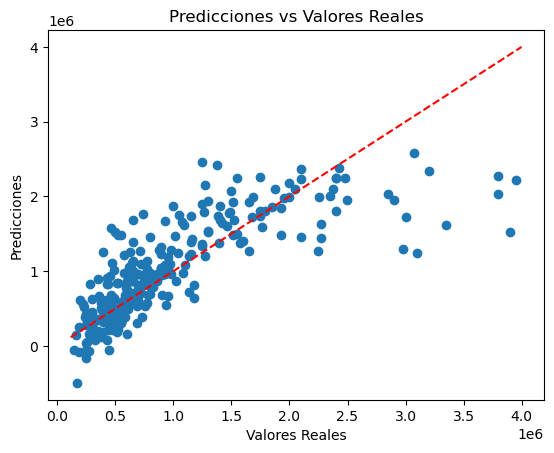

In [33]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea de referencia
plt.show()


<h3>Modelo de regresion Linel Usando Model_enconding<h3>

In [49]:
df_final2=df_encoded[['Model_enconding','id_Make','Price','Kilometer','Transmission_Manual','Year','Fuel Tank Capacity','id_Owner','id_Fuel_Type']]


Model_enconding  id_Make   Price  Kilometer  Transmission_Manual  Year  \
0       505000.000000        1  505000      87150                    1  2017   
1       414714.214286        2  450000      75000                    1  2014   
2       293125.000000        3  220000      67000                    1  2011   
3       762250.000000        4  799000      37500                    1  2019   
5       675000.000000        2  675000      73315                    1  2017   
...               ...      ...     ...        ...                  ...   ...   
2051    887000.000000        2  925000      48000                    1  2021   
2052    439999.666667        3  409999      68000                    1  2014   
2053    245000.000000        2  245000      79000                    1  2014   
2055    262500.000000        3  275000      83000                    1  2014   
2056    240000.000000       12  240000      73000                    1  2013   

      Fuel Tank Capacity  id_Owner  id_Fuel_Type  
0                   35.0         1             1  
1                   42.0         2             2  
2                   35.0         1             1  
3                   37.0         1             1  
5                   43.0         1             1  
...                  ...       ...           ...  
2051                48.0         1             1  
2052                45.0         1             2  
2053                43.0         2             1  
2055                32.0         2             1  
2056                45.0         1             1  

[1372 rows x 9 columns]

In [50]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = df_final2.drop(columns='Price')
y = df_final2['Price']

# Agregar una constante a las variables independientes
X = sm.add_constant(X)

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = sm.OLS(y_train, X_train).fit()

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Resultados del modelo
print(model.summary())

# Medidas de precisión del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     3285.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:57:22   Log-Likelihood:                -14698.
No. Observations:                1097   AIC:                         2.941e+04
Df Residuals:                    1088   BIC:                         2.946e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.829e+07   4

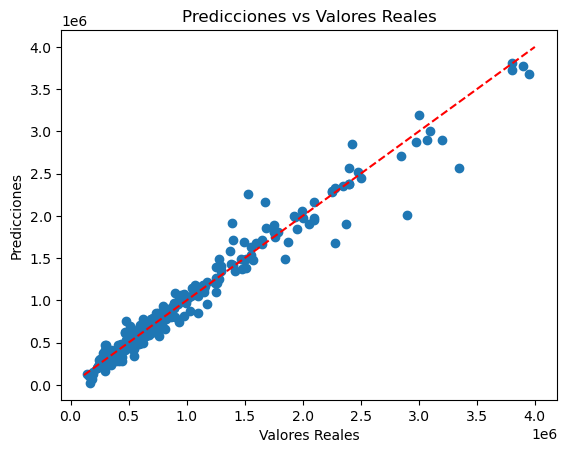

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # línea de referencia
plt.show()